In [42]:
## Data source
# https://www.kaggle.com/wendykan/lending-club-loan-data

### Goal
#### Predict if a current alive loan will be default, using the model built upon data of repaid and defaulted loans

## EDA

In [43]:
## load required packages
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [44]:
## Load the dataset 
import os 
os.chdir(r'D:/Dataset/kaggle_Lending Club Loan Data')

loan = pd.read_csv('loan.csv')

print(loan.head())

# 74 columns?
# there may be some errors with reading the dataset 

# check which column has NA
print(loan.isnull().any())

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_li

In [45]:
## check the errors causing the wrong number of columns
print(loan.columns)
print(len(loan.columns))

# get the right column names
correct_col = 'index, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m'
correct_col = correct_col.split(',')
correct_col = [x.strip() for x in correct_col]
print(correct_col)
print(len(correct_col))

# get the difference between them 
print(np.setdiff1d(np.array(correct_col), np.array(loan.columns))) # the array with more elements is put as the former parameter

# the index column is the difference
# this doesn't matter 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [46]:
## Column: id 
print(len(loan))
print(len(np.unique(loan['id']))) # the outcome indicates that the id means individual case 

887379
887379


In [47]:
## Column: member_id
print(len(np.unique(loan['member_id']))) # no duplicated members 

887379


count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


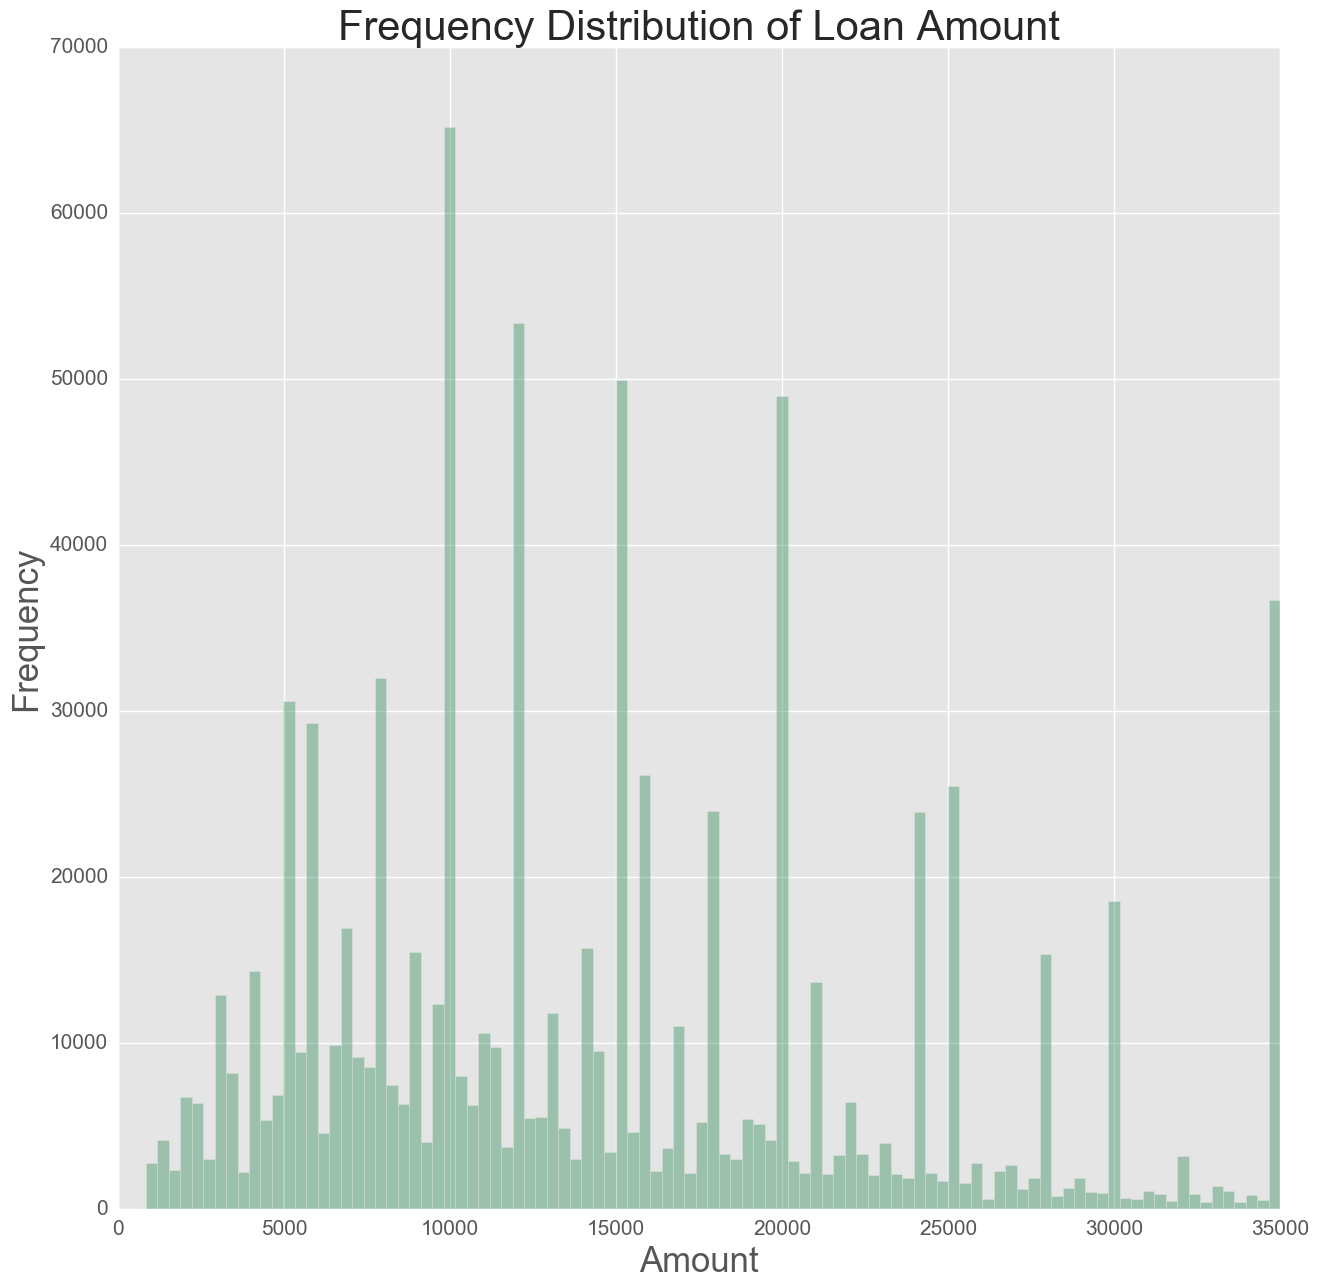

In [48]:
## Column: loan_amnt
print(loan['loan_amnt'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['loan_amnt'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Loan Amount', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('loan_amount_distribution.png', dpi=300) # there are some amounts with extremely high frequency

count    887379.000000
mean      14741.877625
std        8429.897657
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64


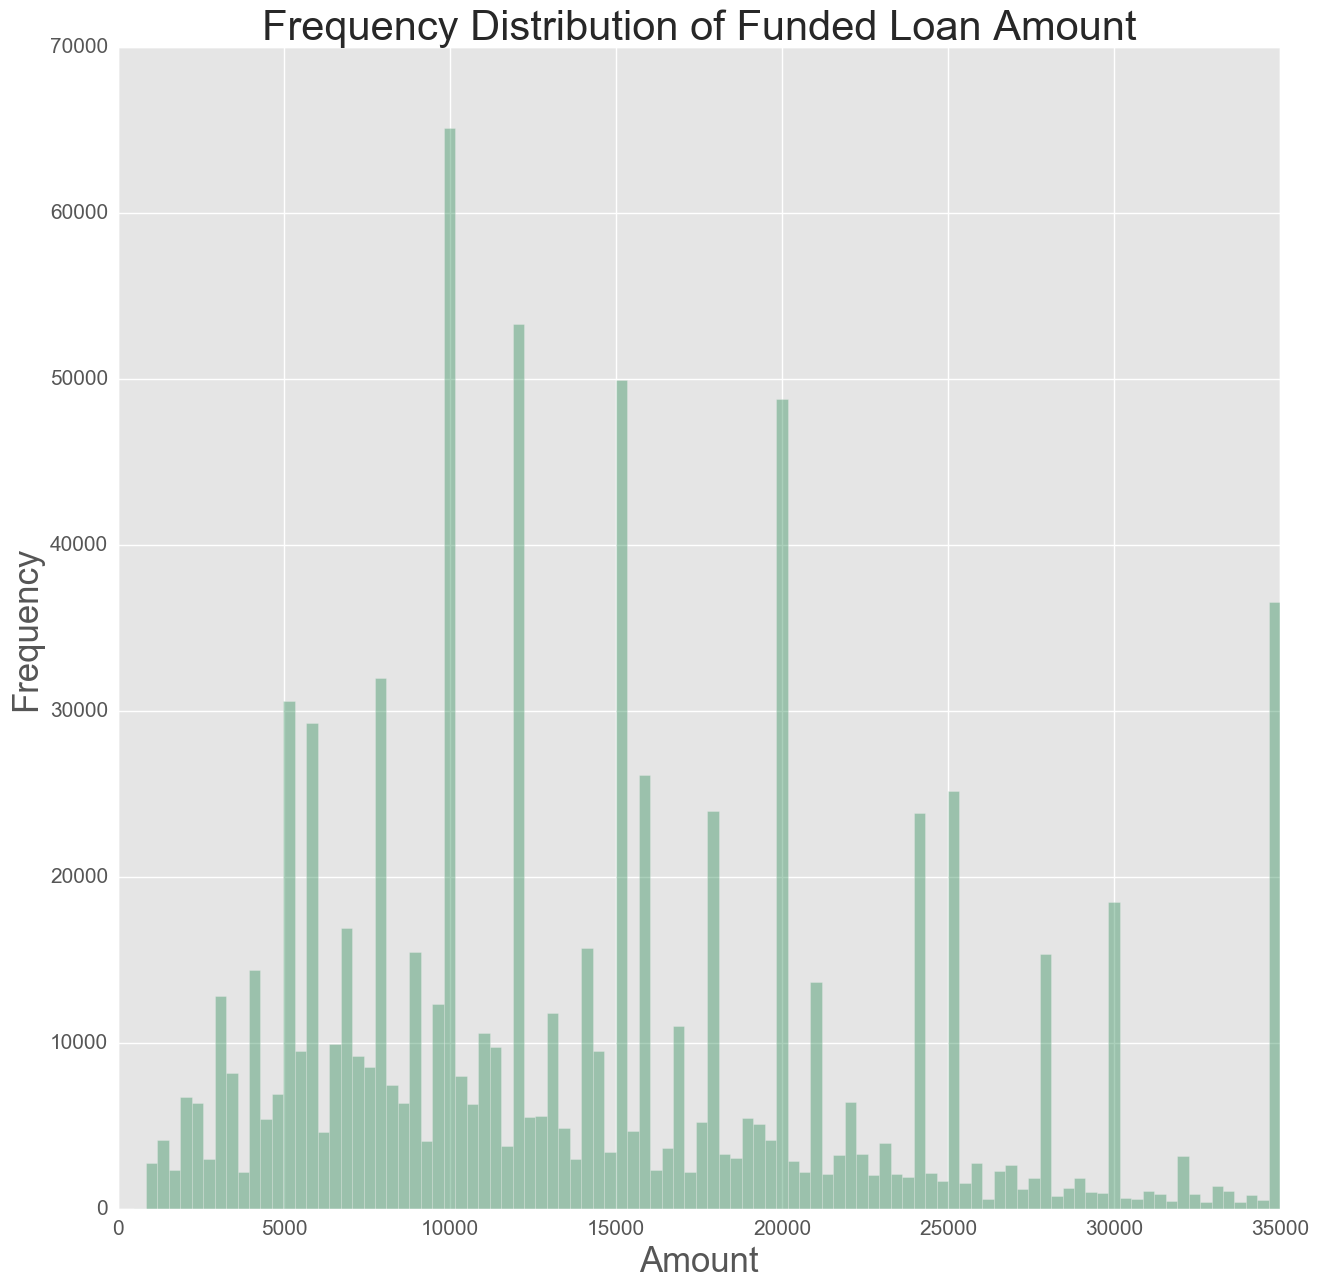

In [49]:
## Column: funded_amnt
print(loan['funded_amnt'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['funded_amnt'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Funded Loan Amount', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('Funded_loan_amount_distribution.png', dpi=300) # there are some amounts with extremely high frequency

count    887379.000000
mean      14702.464383
std        8442.106732
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64


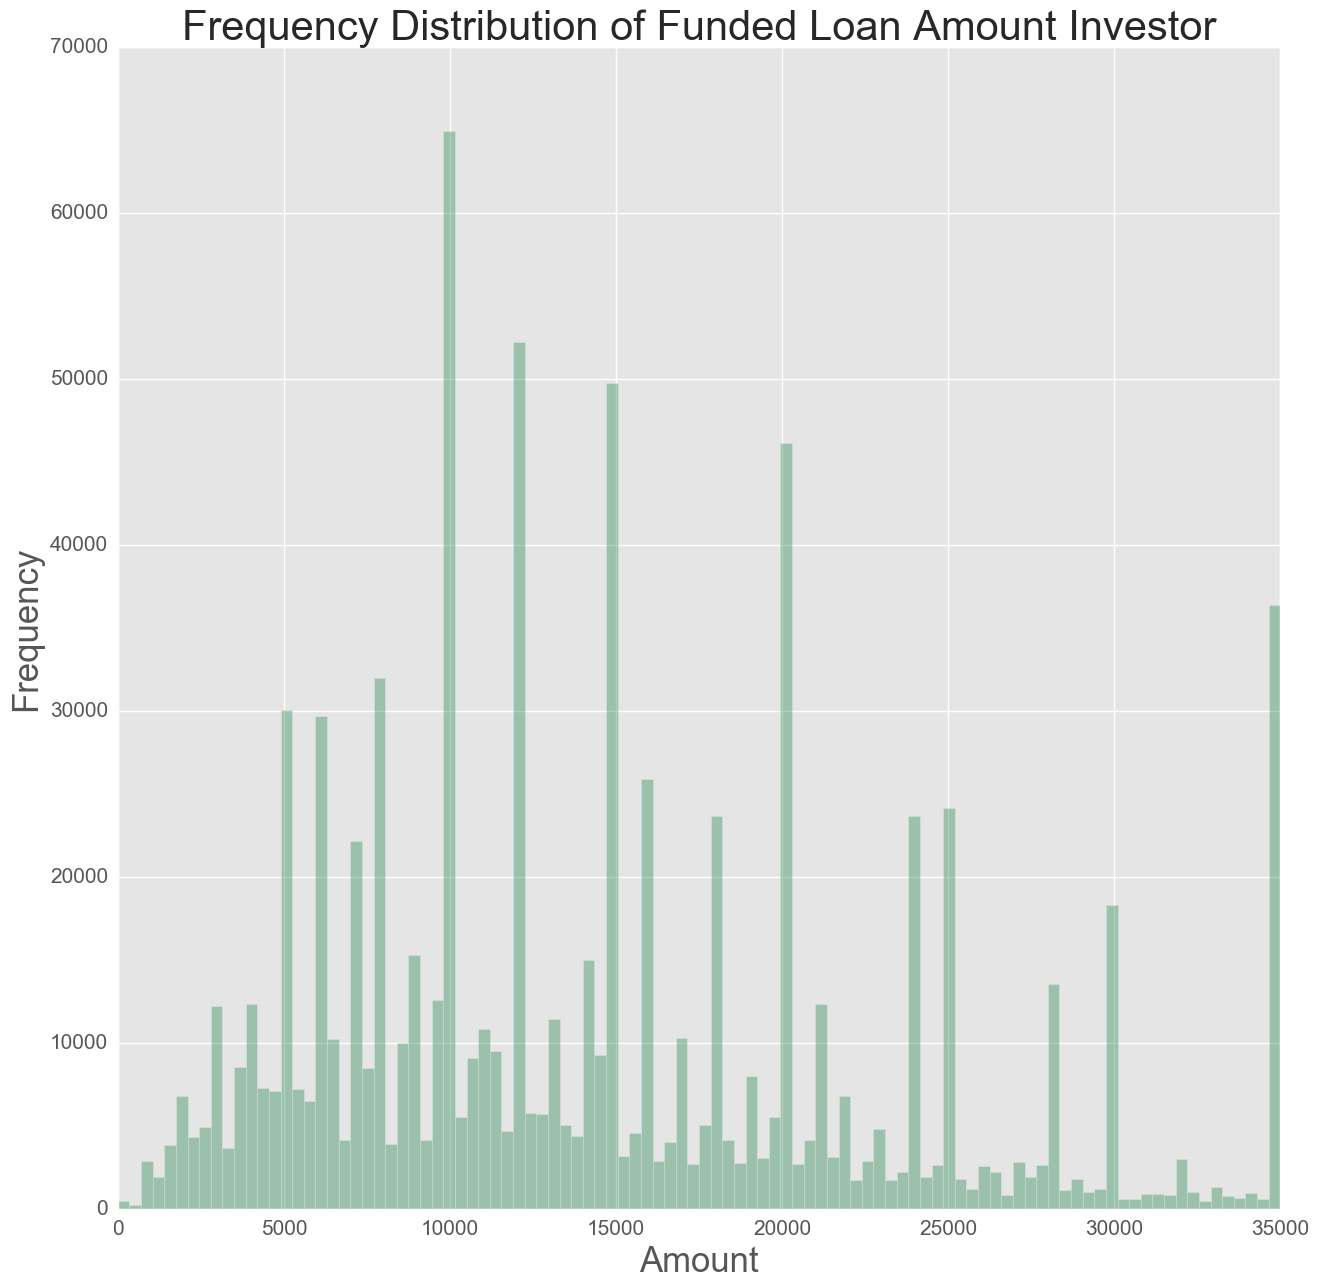

In [50]:
## Column: funded_amnt_inv
print(loan['funded_amnt_inv'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['funded_amnt_inv'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Funded Loan Amount Investor', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('Funded_loan_amount_inv_distribution.png', dpi=300) # there are some amounts with extremely high frequency

#### The overall trend of the first two graphs a almost alike and the third one has some different places to note (at the place between 5000 to 7500, it has high frequencies).

887379
 36 months    621125
 60 months    266254
Name: term, dtype: int64


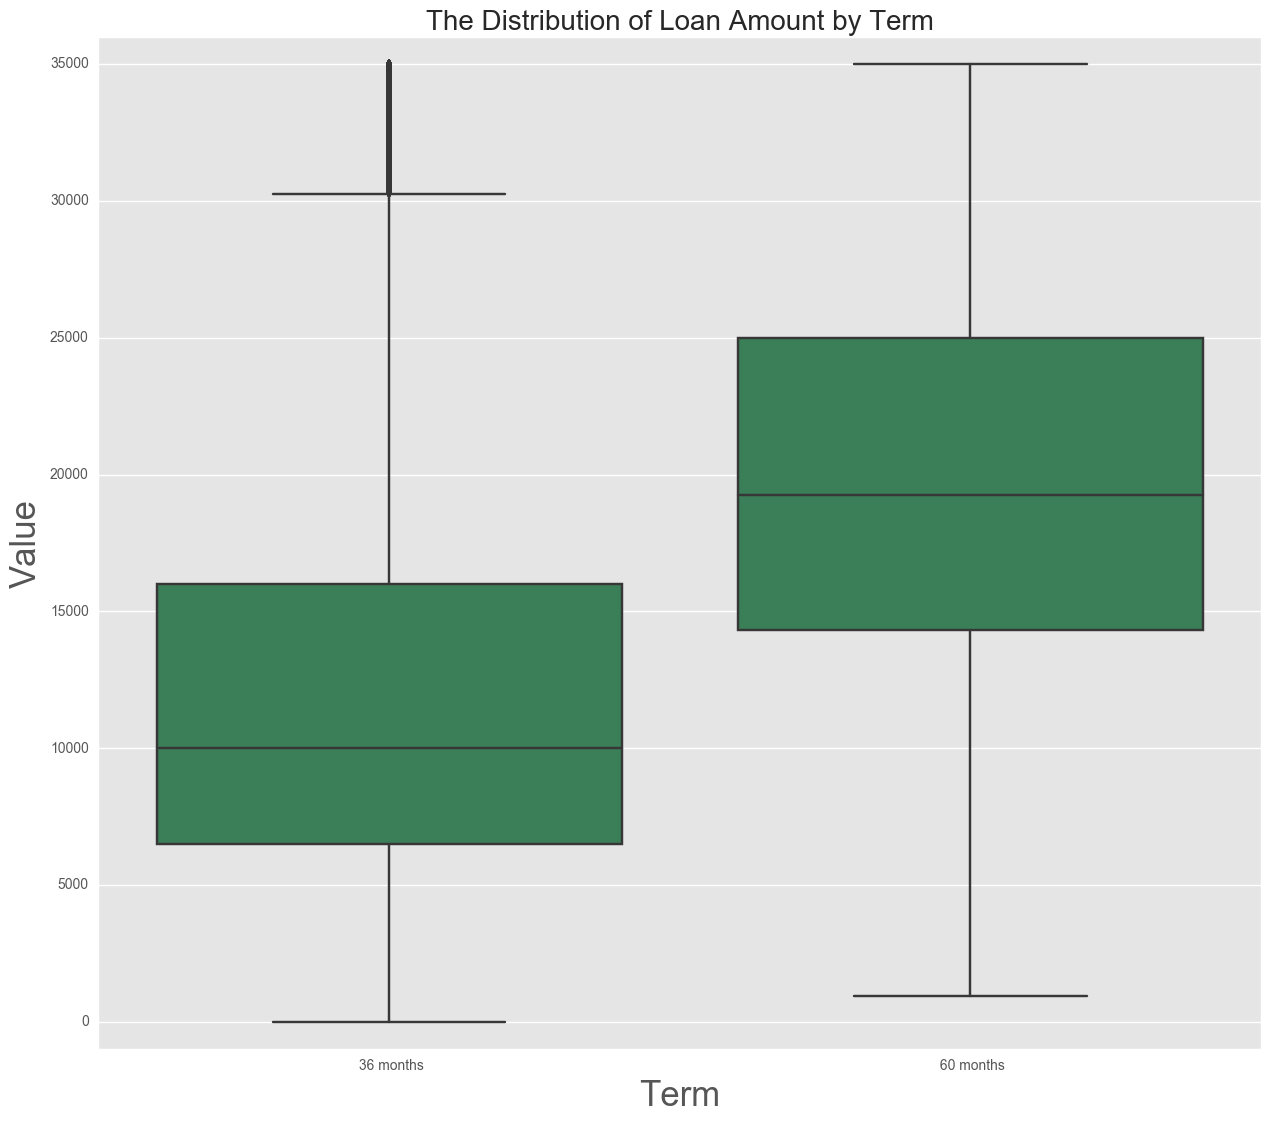

In [51]:
## Column: term 
print(len(loan['term']))
print(loan['term'].value_counts()) # it only has two types of term, 36 and 60 months 

# Visualization: Loan amount by term
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='term', y='funded_amnt_inv', data=loan, orient="v", color='#2E8B57')
axes.set_xlabel('Term', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan['funded_amnt_inv'].min()-1000, loan['funded_amnt_inv'].max()+1000])
axes.set_title('The Distribution of Loan Amount by Term', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Loan_distribution.png_by_term', dpi=300)
# in short, the amount is lower for shorter term, but there are also some extremely high amounts for shorter term 

float64
count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


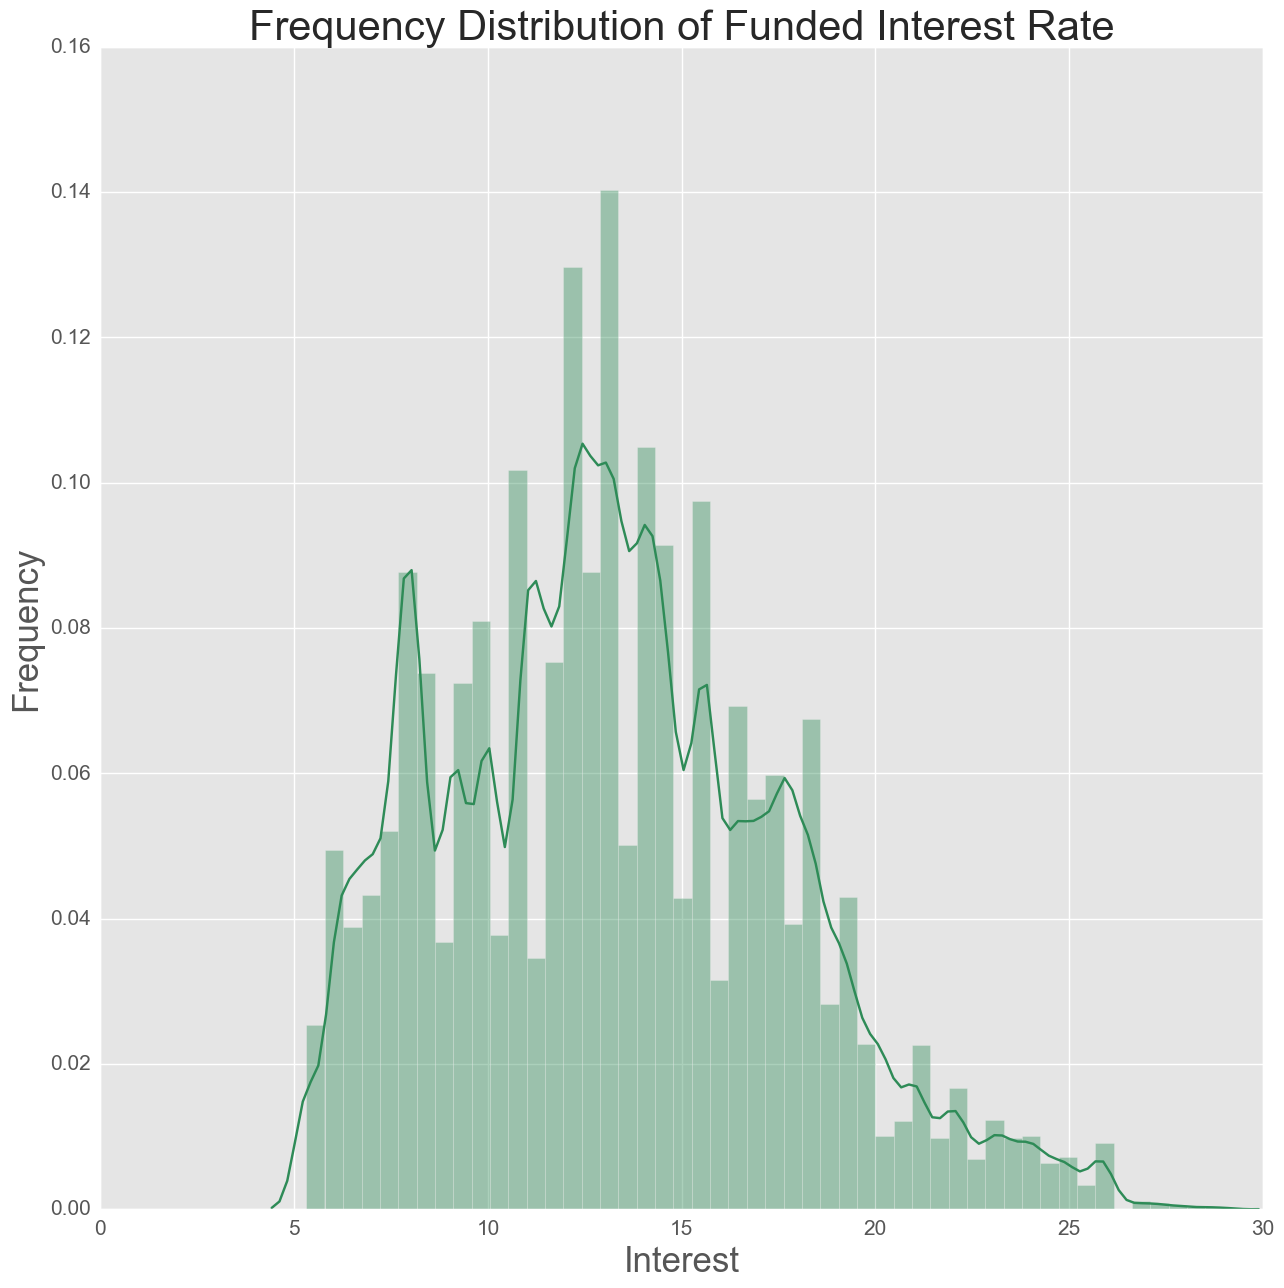

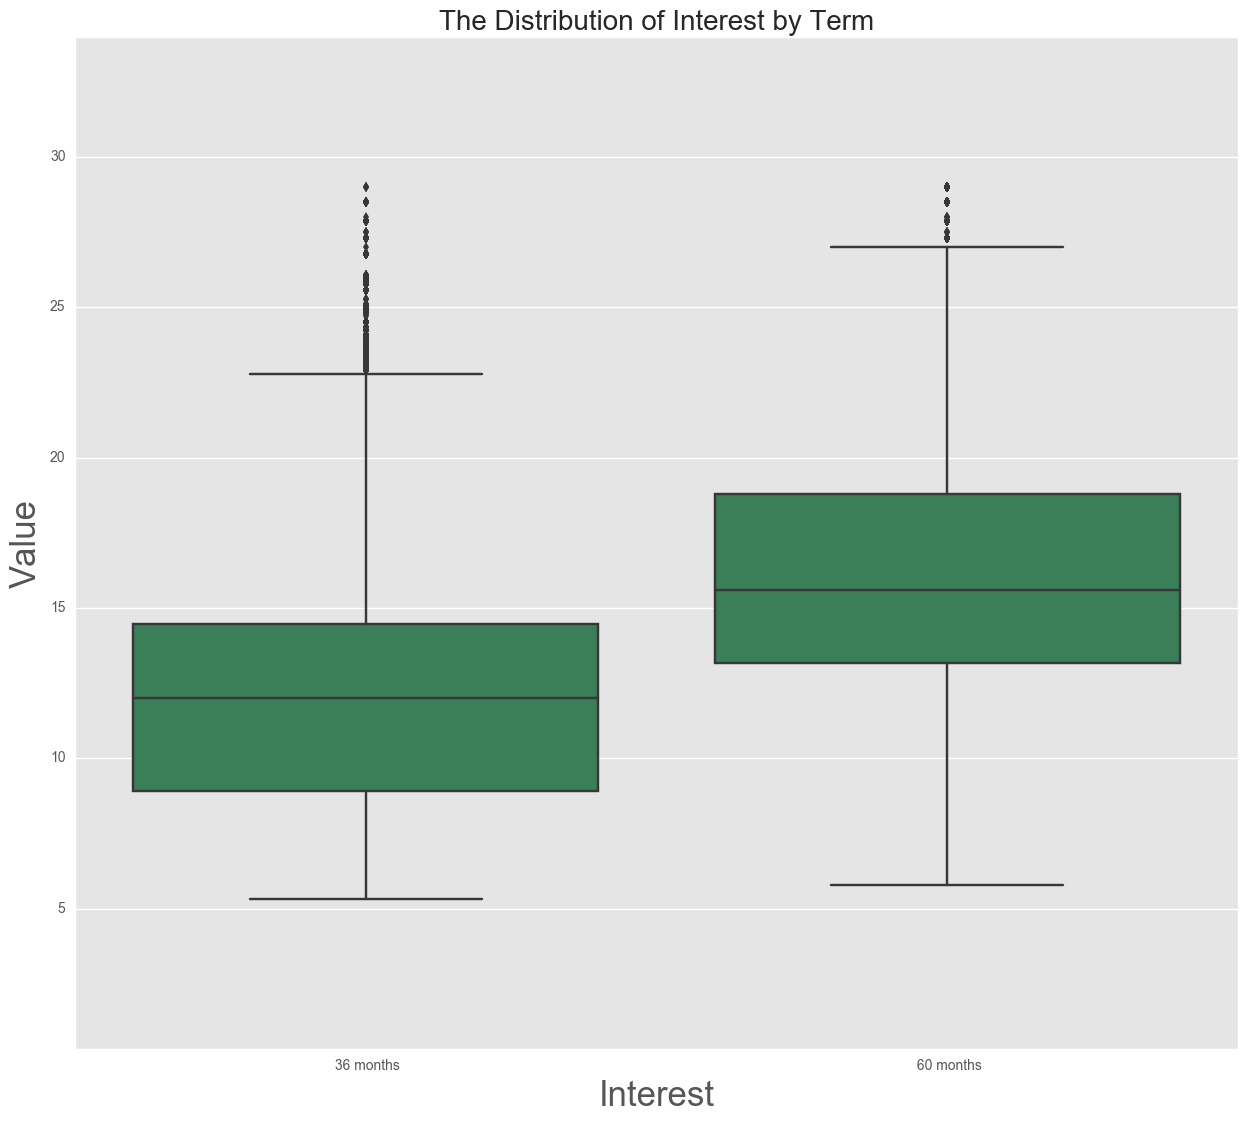

In [52]:
## Column: int_rate
print(loan['int_rate'].dtype)
print(loan['int_rate'].describe()) # looks like there are some extreme values 

# visualization: the distribution of interest rate
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['int_rate'], bins=50, kde=True, color='#2E8B57')
axes.set_title('Frequency Distribution of Funded Interest Rate', fontsize=30)
axes.set_xlabel('Interest', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('Interest_distribution.png', dpi=300) # there are mainly two peaks around 7.5 and the center

# visualization: the distribution of interest by term 
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='term', y='int_rate', data=loan, orient="v", color='#2E8B57')
axes.set_xlabel('Interest', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan['int_rate'].min()-5, loan['int_rate'].max()+5])
axes.set_title('The Distribution of Interest by Term', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Interest_distribution.png_by_term', dpi=300)
# in short, the interest rate is higher for longer term, but there are some extremely high values for shorter term 

### EDA on loan_status

In [53]:
## Column: loan_status 
print(loan['loan_status'].dtype)
print(loan['loan_status'].value_counts())

# categories assigned to default: Charged Off, Does not meet the credit policy. Status:Charged Off and Default
# categories assigned to non-default: Fully Paid, Does not meet the credit policy. Status:Fully Paid

retain_li = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default', 'Fully Paid',
            'Does not meet the credit policy. Status:Fully Paid']
loan_filtered = loan.ix[loan['loan_status'].isin(retain_li), :]
print('\n----------')
print(loan_filtered['loan_status'].value_counts())

# assign the default categories
default_map = dict()
for i in retain_li:
    if i in ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']:
        default_map[i] = 1
    else:
        default_map[i] = 0
print(default_map)

loan_filtered['Default'] = loan_filtered['loan_status'].map(default_map)
print(loan_filtered['Default'].value_counts())

object
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

----------
Fully Paid                                             207723
Charged Off                                             45248
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
## Split the data to training and test set
X = loan_filtered.ix[:, loan_filtered.columns != 'Default']
y = loan_filtered.ix[:, loan_filtered.columns == 'Default']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=100) # stratified split based on y
print(X_train.shape)
print(y_train.shape)
print(y_train.mean())
print(y_test.mean()) # check the category ratio

loan_train = pd.concat([X_train, y_train], axis=1)
loan_train.index = list(range(len(loan_train)))
print(loan_train.shape)

(205551, 74)
(205551, 1)
Default    0.183808
dtype: float64
Default    0.183817
dtype: float64
(205551, 75)


In [55]:
## Overview
# check which column has NA
print(loan_train.isnull().any())

id                             False
member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
grade                          False
sub_grade                      False
emp_title                       True
emp_length                     False
home_ownership                 False
annual_inc                      True
verification_status            False
issue_d                        False
loan_status                    False
pymnt_plan                     False
url                            False
desc                            True
purpose                        False
title                           True
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                     True
earliest_cr_line                True
i

F_onewayResult(statistic=659.42479356164824, pvalue=3.3831428079203538e-145)
14500.2024774
13312.2477931
KruskalResult(statistic=-38005682.410609402, pvalue=1.0)
F_onewayResult(statistic=652.82456706203334, pvalue=9.1232960353548843e-144)
14451.602615
13272.7430276
KruskalResult(statistic=-38004799.387956709, pvalue=1.0)
F_onewayResult(statistic=581.62736931745462, pvalue=2.5064650165446328e-128)
14281.2034754
13163.5098137
KruskalResult(statistic=-37984248.868978836, pvalue=1.0)


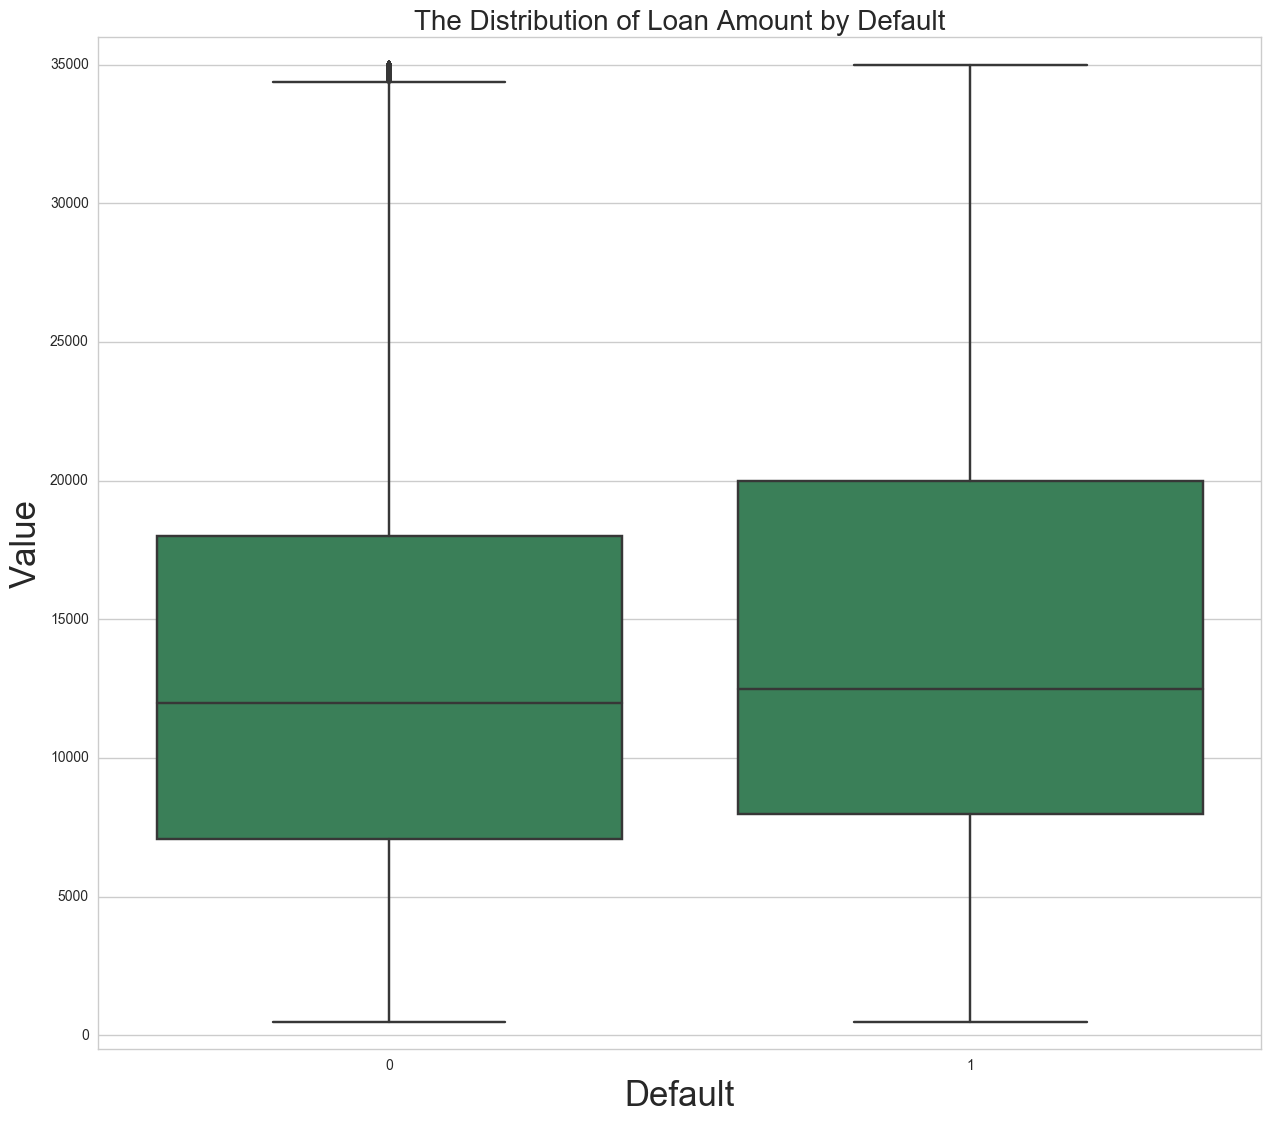

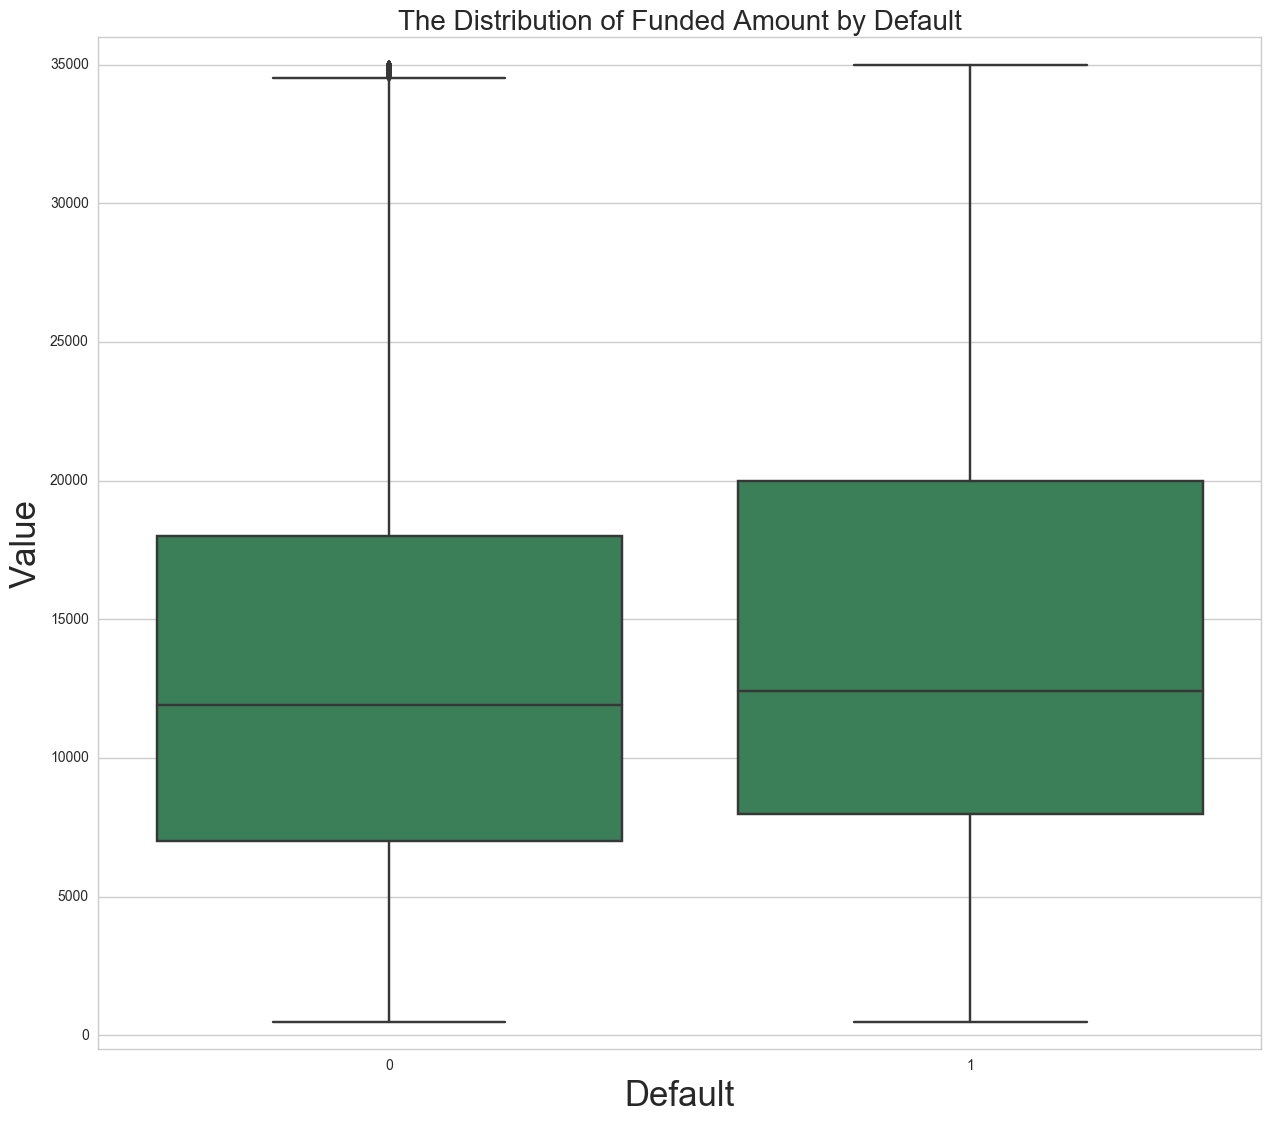

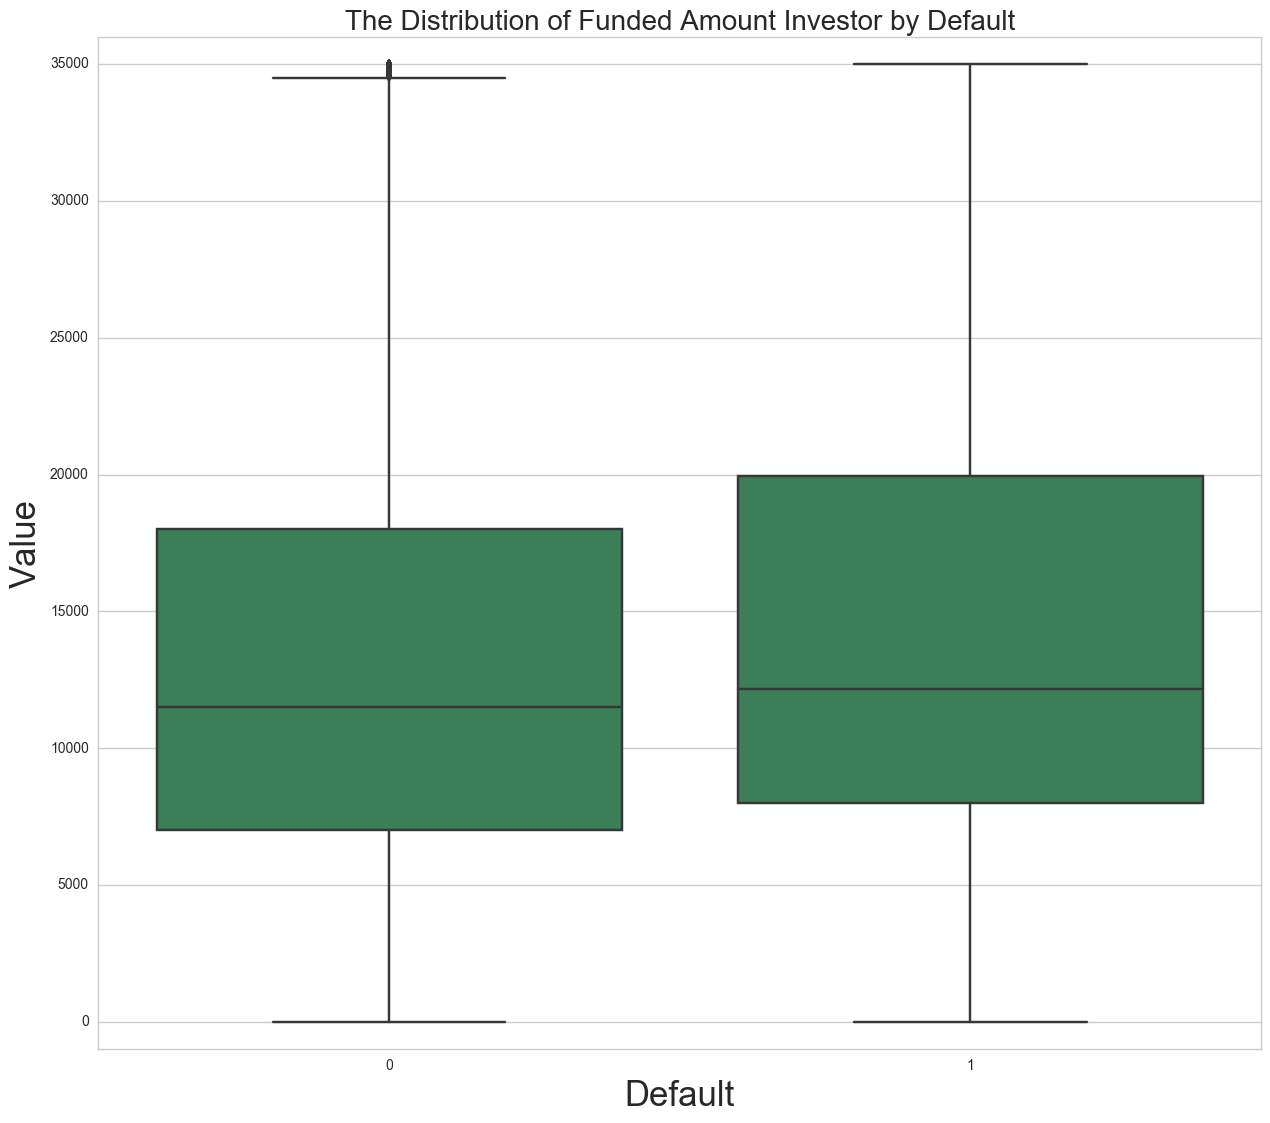

In [56]:
## loan amount by Default

# visualization: the distribution of loan amount by Default (loan_amnt)
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='loan_amnt', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['loan_amnt'].min()-1000, loan_train['loan_amnt'].max()+1000])
axes.set_title('The Distribution of Loan Amount by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Loan_amount_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['loan_amnt'][ind].values, loan_train['loan_amnt'][~ind].values))
print(loan_train['loan_amnt'][ind].values.mean())
print(loan_train['loan_amnt'][~ind].values.mean())

from scipy.stats import kruskal
print(kruskal(loan_train['loan_amnt'][ind].values, loan_train['loan_amnt'][~ind].values))

# visualization: the distribution of loan amount by Default (funded_amnt)
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='funded_amnt', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['funded_amnt'].min()-1000, loan_train['funded_amnt'].max()+1000])
axes.set_title('The Distribution of Funded Amount by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Loan_amount_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['funded_amnt'][ind].values, loan_train['funded_amnt'][~ind].values))
print(loan_train['funded_amnt'][ind].values.mean())
print(loan_train['funded_amnt'][~ind].values.mean())

from scipy.stats import kruskal
print(kruskal(loan_train['funded_amnt'][ind].values, loan_train['funded_amnt'][~ind].values))

# visualization: the distribution of loan amount by Default (funded_amnt_inv)
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='funded_amnt_inv', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['funded_amnt_inv'].min()-1000, loan_train['funded_amnt_inv'].max()+1000])
axes.set_title('The Distribution of Funded Amount Investor by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Loan_amount_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['funded_amnt_inv'][ind].values, loan_train['funded_amnt_inv'][~ind].values))
print(loan_train['funded_amnt_inv'][ind].values.mean())
print(loan_train['funded_amnt_inv'][~ind].values.mean())

from scipy.stats import kruskal
print(kruskal(loan_train['funded_amnt_inv'][ind].values, loan_train['funded_amnt_inv'][~ind].values))

 36 months    159944
 60 months     45607
Name: term, dtype: int64
False
term      36 months   60 months
Default                        
0            135628       32141
1             24316       13466
term      36 months   60 months
Default                        
0         80.842110   19.157890
1         64.358689   35.641311
(4852.0587517288477, 0.0, 1, array([[ 130544.94960375,   37224.05039625],
       [  29399.05039625,    8382.94960375]]))


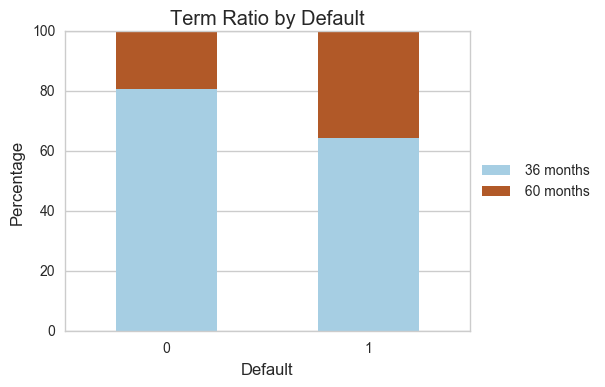

In [57]:
## Term by Default 
print(loan_train['term'].value_counts())
print(loan_train['term'].isnull().any()) # no NAs
tab = pd.crosstab(loan_train['Default'], loan_train['term'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Term Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Term_ratio_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant

F_onewayResult(statistic=12550.026797811674, pvalue=0.0)
15.9967802128
13.2794311226
3.84150406183
KruskalResult(statistic=-38627938.836671777, pvalue=1.0)


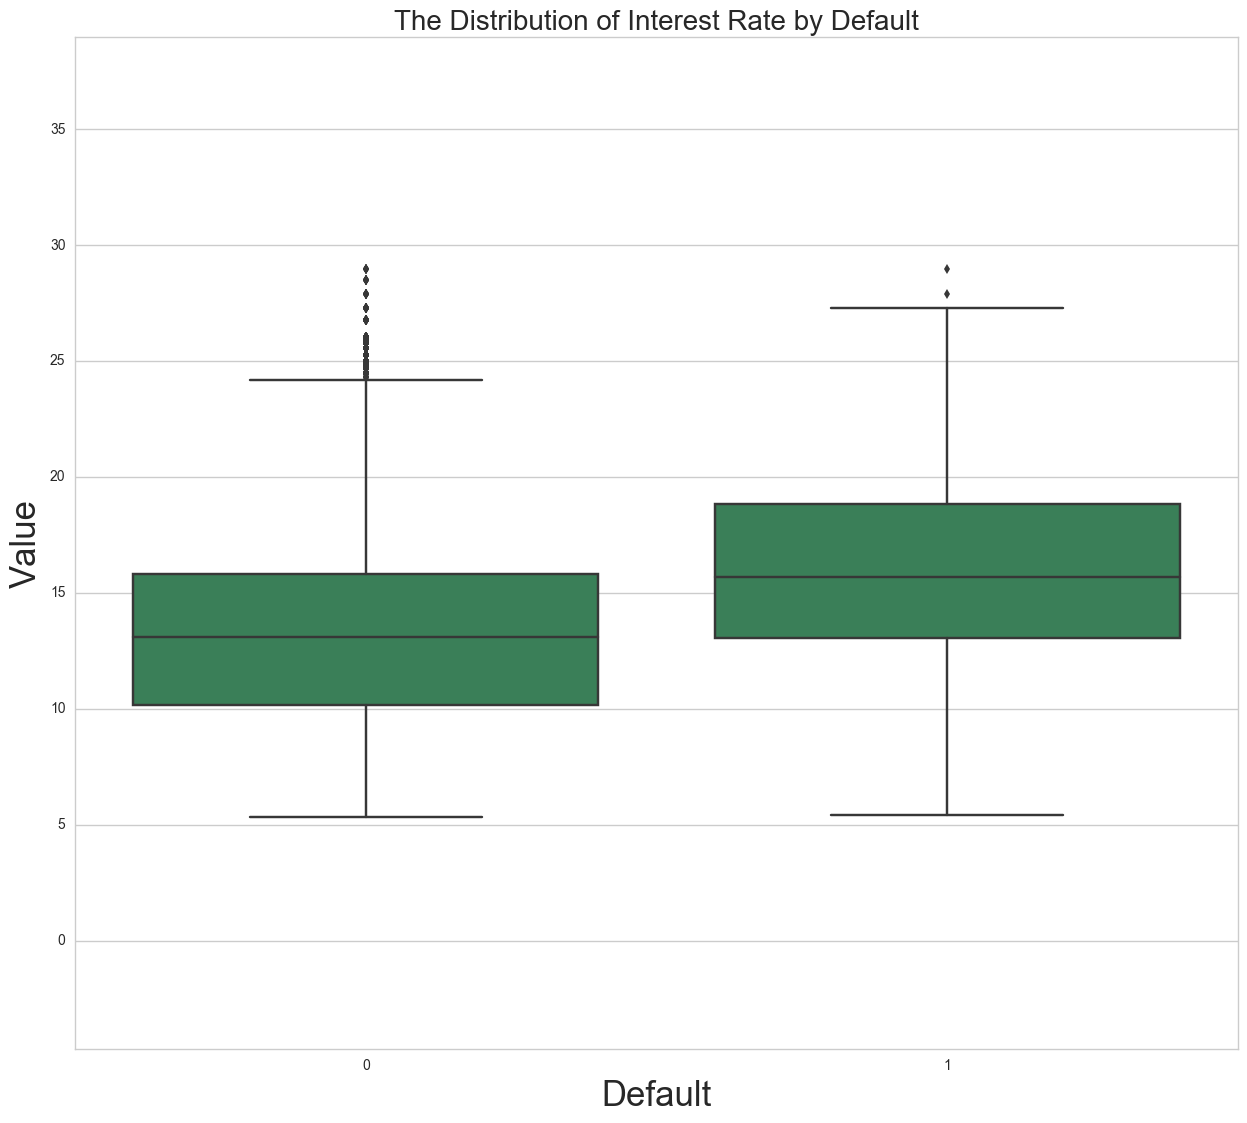

In [58]:
## Interest rate by Default
# visualization: the distribution of Interest rate by Default
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='int_rate', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['int_rate'].min()-10, loan_train['int_rate'].max()+10])
axes.set_title('The Distribution of Interest Rate by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Interest_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['int_rate'][ind].values, loan_train['int_rate'][~ind].values))
print(loan_train['int_rate'][ind].values.mean())
print(loan_train['int_rate'][~ind].values.mean())

from scipy.stats import f
print(f.ppf(0.95, 1, 205551-1-1))
# significant?

from scipy.stats import kruskal
print(kruskal(loan_train['int_rate'][ind].values, loan_train['int_rate'][~ind].values))

F_onewayResult(statistic=363.10003181603184, pvalue=6.9905306320961568e-81)
439.014036843
412.41839583
3.84150406183
KruskalResult(statistic=-37958533.747438848, pvalue=1.0)


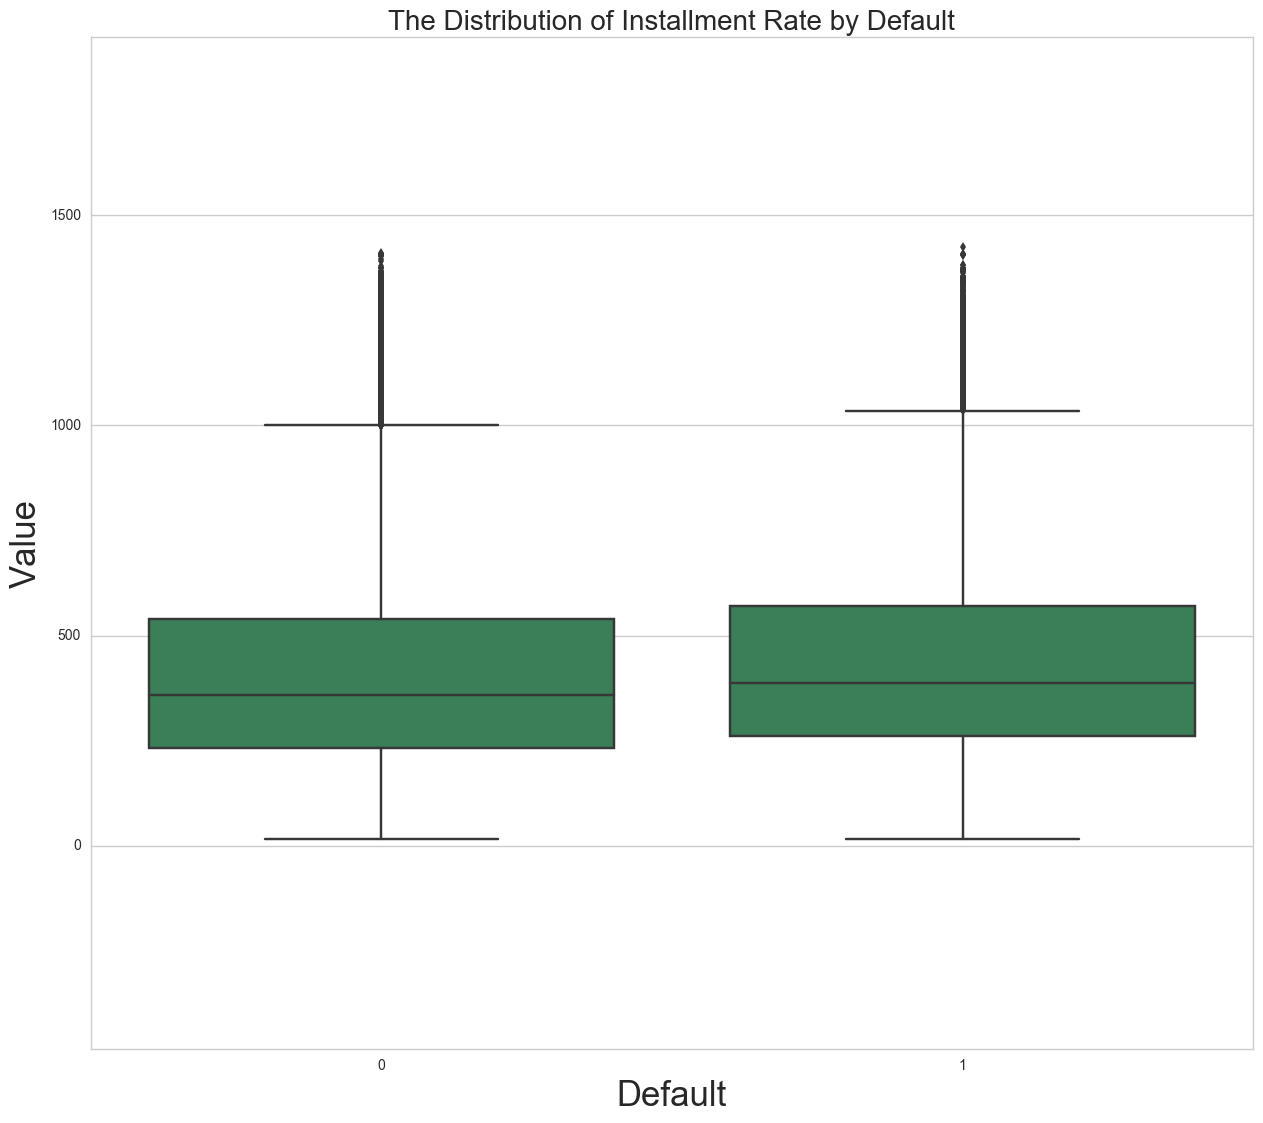

In [59]:
## installment by Default
# visualization: the distribution of Installment by Default
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='installment', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['installment'].min()-500, loan_train['installment'].max()+500])
axes.set_title('The Distribution of Installment Rate by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Interest_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['installment'][ind].values, loan_train['installment'][~ind].values))
print(loan_train['installment'][ind].values.mean())
print(loan_train['installment'][~ind].values.mean())

from scipy.stats import f
print(f.ppf(0.95, 1, 205551-1-1))
# not significant

from scipy.stats import kruskal
print(kruskal(loan_train['installment'][ind].values, loan_train['installment'][~ind].values))

object
B    61265
C    53088
A    33966
D    33237
E    15882
F     6423
G     1690
Name: grade, dtype: int64
False
grade        A      B      C      D      E     F     G
Default                                               
0        31864  53389  42538  24451  10609  3916  1002
1         2102   7876  10550   8786   5273  2507   688
grade            A          B          C          D          E         F  \
Default                                                                    
0        18.992782  31.822923  25.355101  14.574206   6.323576  2.334162   
1         5.563496  20.845905  27.923350  23.254460  13.956381  6.635435   

grade           G  
Default            
0        0.597250  
1        1.820973  
(10840.597056802309, 0.0, 6, array([[ 27722.76395639,  50003.97850169,  43329.97977144,  27127.76027847,
         12962.7550243 ,   5242.39866019,   1379.36380752],
       [  6243.23604361,  11261.02149831,   9758.02022856,   6109.23972153,
          2919.2449757 ,   1180.601339

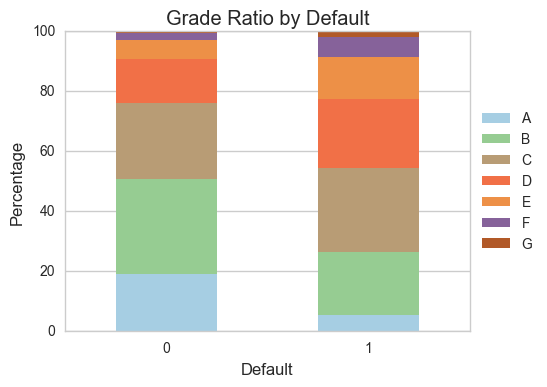

In [60]:
## Grade by Default
print(loan_train['grade'].dtype)
print(loan_train['grade'].value_counts())
#print(loan['grade'].value_counts())

print(loan_train['grade'].isnull().any()) # no NAs
tab = pd.crosstab(loan_train['Default'], loan_train['grade'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Grade Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Grade_ratio_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant

object
B3    14491
B4    13670
C1    12201
B2    11748
C2    11652
B5    11564
C3    10409
B1     9792
C4     9776
A5     9710
C5     9050
A4     8863
D1     8220
D2     7406
D3     6572
D4     6058
A3     5749
A2     4981
D5     4981
A1     4663
E1     3885
E2     3747
E3     3149
E4     2740
E5     2361
F1     1879
F2     1447
F3     1284
F4      993
F5      820
G1      587
G2      416
G3      282
G4      215
G5      190
Name: sub_grade, dtype: int64
False
sub_grade    A1    A2    A3    A4    A5    B1     B2     B3     B4    B5 ...   \
Default                                                                  ...    
0          4516  4756  5431  8236  8925  8776  10447  12623  11737  9806 ...    
1           147   225   318   627   785  1016   1301   1868   1933  1758 ...    

sub_grade    F1   F2   F3   F4   F5   G1   G2   G3   G4   G5  
Default                                                       
0          1222  920  761  564  449  341  245  161  143  112  
1           657  527  5

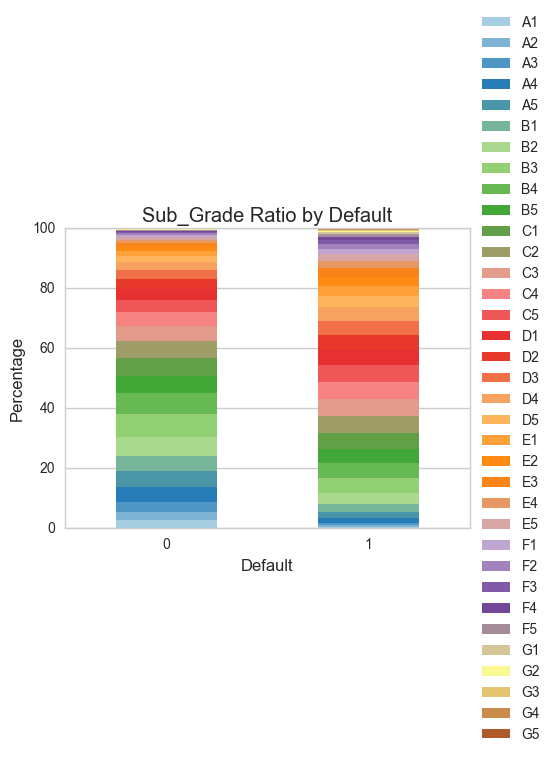

In [61]:
## Sub_grade by Default
print(loan_train['sub_grade'].dtype)
print(loan_train['sub_grade'].value_counts())
#print(loan['grade'].value_counts())

print(loan_train['sub_grade'].isnull().any()) # no NAs
tab = pd.crosstab(loan_train['Default'], loan_train['sub_grade'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Sub_Grade Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Sub_Grade_ratio_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant

In [62]:
## Employment title by Default 
# this feature has NAs
print(loan_train['emp_title'].value_counts())
print(loan_train['emp_title'].value_counts().shape)
# this may have some influences, but it is hard to preprocess...
# maybe choosing the manager?


Manager                                    1584
Teacher                                    1550
Supervisor                                  719
RN                                          695
Registered Nurse                            673
Sales                                       569
Project Manager                             540
manager                                     476
Driver                                      446
Office Manager                              439
Director                                    417
Engineer                                    376
US Army                                     373
General Manager                             361
Owner                                       360
teacher                                     316
Vice President                              312
driver                                      303
Accountant                                  298
Operations Manager                          282
supervisor                              

object
10+ years    62261
2 years      19147
< 1 year     17105
3 years      16588
5 years      14690
1 year       13827
4 years      13182
6 years      11998
7 years      11483
8 years       9581
n/a           7965
9 years       7724
Name: emp_length, dtype: int64
10    62261
1     30932
2     19147
3     16588
5     14690
4     13182
6     11998
7     11483
8      9581
9      7724
Name: emp_length, dtype: int64
1    147507
0     50079
Name: emp_length_larger, dtype: int64
emp_length     1      2      3      4      5     6     7     8     9      10
Default                                                                     
0           25217  15800  13627  10872  12035  9781  9292  7789  6244  51220
1            5715   3347   2961   2310   2655  2217  2191  1792  1480  11041
emp_length         1         2         3         4         5         6   \
Default                                                                   
0           15.577877  9.760497  8.418120  6.716210  7.434657  

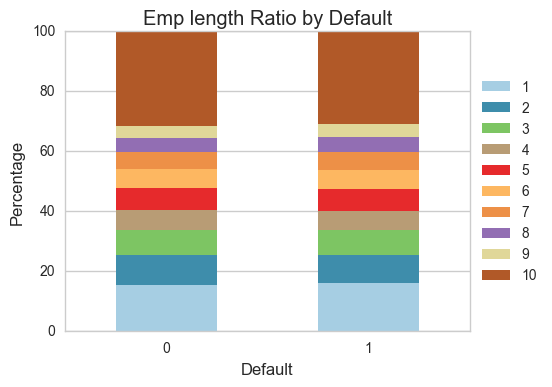

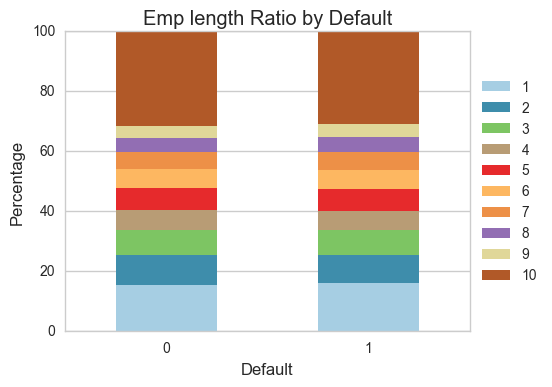

In [63]:
## Employment length by Default 
print(loan_train['emp_length'].dtype)
print(loan_train['emp_length'].value_counts())
# may cut the employment length with other values?
# try 10
cut_num = 3
import re 
loan_train['emp_length'] = loan_train['emp_length'].apply(lambda x: re.sub('year(s*)', '', x)).apply(lambda x: re.sub('[<+]', '', x)).apply(lambda x: x.strip())
loan_train = loan_train.ix[loan_train['emp_length'] != 'n/a', :]
loan_train['emp_length'] = loan_train['emp_length'].apply(lambda x: int(x))
print(loan_train['emp_length'].value_counts())

map_dict = dict()
for digit in list(loan_train['emp_length'].unique()):
    if digit >= cut_num:
        map_dict[digit] = 1
    else:
        map_dict[digit] = 0

loan_train['emp_length_larger'] = loan_train['emp_length'].map(map_dict)
print(loan_train['emp_length_larger'].value_counts())

# vis 10
tab = pd.crosstab(loan_train['Default'], loan_train['emp_length'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Emp length Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Emp_length_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant


# vis all
tab = pd.crosstab(loan_train['Default'], loan_train['emp_length'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Emp length Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Emp_length_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # unsignificant



object
MORTGAGE    97626
RENT        83438
OWN         16344
OTHER         140
NONE           37
ANY             1
Name: home_ownership, dtype: int64
MORTGAGE    97626
RENT        83438
OWN         16344
OTHER         178
Name: home_ownership, dtype: int64
home_ownership  MORTGAGE  OTHER    OWN   RENT
Default                                      
0                  81824    144  13345  66564
1                  15802     34   2999  16874
home_ownership   MORTGAGE     OTHER       OWN       RENT
Default                                                 
0               50.547020  0.088956  8.243914  41.120110
1               44.252149  0.095214  8.398443  47.254194
(496.26933877097167, 3.070107545738369e-107, 3, array([[  7.99824077e+04,   1.45830707e+02,   1.33902083e+04,
          6.83585534e+04],
       [  1.76435923e+04,   3.21692934e+01,   2.95379175e+03,
          1.50794466e+04]]))


C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


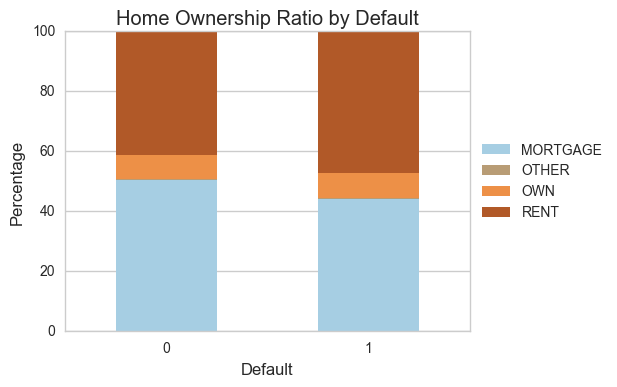

In [64]:
## Homwe ownership by Default 
print(loan_train['home_ownership'].dtype)
print(loan_train['home_ownership'].value_counts())

# assign the OTHER and NONE and ANY to OTHER
loan_train['home_ownership'][loan_train['home_ownership'].isin(['NONE', 'ANY'])] = 'OTHER'
print(loan_train['home_ownership'].value_counts())

tab = pd.crosstab(loan_train['Default'], loan_train['home_ownership'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Home Ownership Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Home_ownership_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1.975830e+05
mean     7.354012e+04
std      5.827184e+04
min      1.896000e+03
25%               NaN
50%               NaN
75%               NaN
max      7.141778e+06
Name: annual_inc, dtype: float64
F_onewayResult(statistic=703.58665195120568, pvalue=9.2879883354408753e-155)
66149.6590997
75170.439304
3.84150406183
KruskalResult(statistic=59762555.389629364, pvalue=0.0)


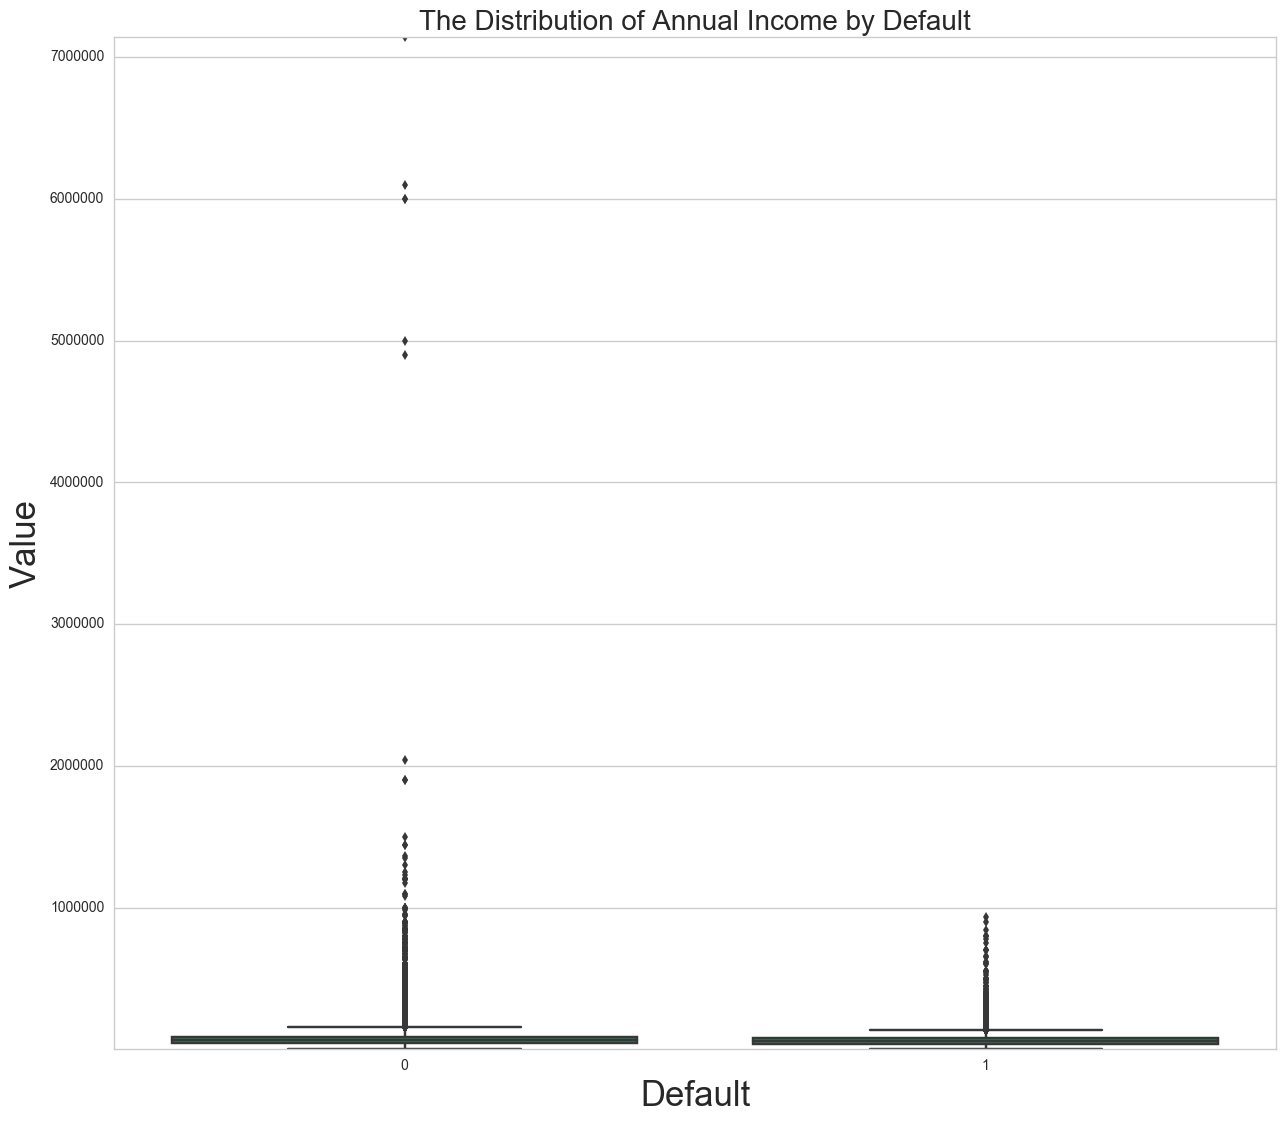

In [65]:
## Annual income by Default

print(loan_train['annual_inc'].describe())
# it has NAs

# the number of NAs
np.sum(loan_train['annual_inc'].isnull()) # 3

# delete the NAs from annual income
loan_train = loan_train.ix[~(loan_train['annual_inc'].isnull()), :]
loan_train.index = list(range(len(loan_train)))

# visualization: the distribution of Annual Income by Default
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='annual_inc', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['annual_inc'].min()-1000, loan_train['annual_inc'].max()+1000])
axes.set_title('The Distribution of Annual Income by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('Annual_Income_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(loan_train['annual_inc'][ind].values, loan_train['annual_inc'][~ind].values))
print(loan_train['annual_inc'][ind].values.mean())
print(loan_train['annual_inc'][~ind].values.mean())

from scipy.stats import f
print(f.ppf(0.95, 1, 205551-1-1))
# not significant

from scipy.stats import kruskal
print(kruskal(loan_train['annual_inc'][ind].values, loan_train['annual_inc'][~ind].values)) # significant 

object
Oct-2014    6701
Jul-2014    6570
Nov-2013    5183
Oct-2013    5141
Apr-2014    5116
Dec-2013    5098
Aug-2013    4978
May-2014    4957
Jan-2014    4910
Sep-2013    4909
Jul-2013    4732
Mar-2014    4721
Jun-2013    4652
May-2013    4576
Nov-2012    4574
Oct-2012    4459
Sep-2012    4417
Feb-2014    4411
Jan-2015    4310
Apr-2013    4296
Jan-2013    4281
Dec-2012    4171
Jun-2014    4151
Aug-2014    3992
Aug-2012    3876
Mar-2013    3785
Nov-2014    3777
Feb-2013    3490
Jul-2012    3402
Jun-2012    2760
            ... 
Sep-2009     406
Nov-2015     371
Aug-2009     360
Jun-2009     347
Jul-2009     334
Mar-2008     331
May-2009     292
Dec-2015     277
Apr-2009     268
Mar-2009     262
Jan-2008     244
Feb-2008     243
Feb-2009     243
Jan-2009     210
Apr-2008     199
Dec-2008     197
Nov-2008     167
Dec-2007     132
Jul-2008     106
May-2008      99
Jun-2008      93
Oct-2008      92
Nov-2007      87
Oct-2007      82
Aug-2008      81
Aug-2007      61
Sep-2008      51
Sep-200

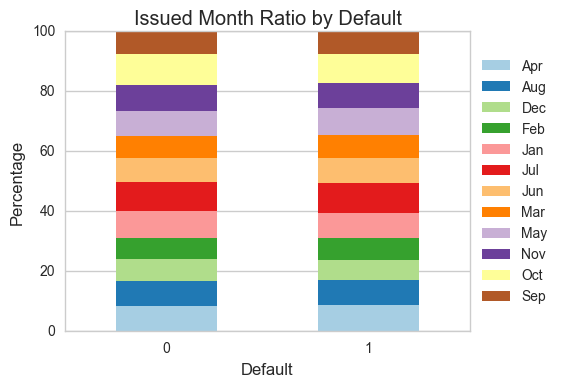

In [66]:
## Issued month by Default
print(loan_train['issue_d'].dtype)
print(loan_train['issue_d'].value_counts()) # we just want to consider the month 

# transform the representation 
loan_train['issue_d'] = loan_train['issue_d'].apply(lambda x: x.split('-')[0])

tab = pd.crosstab(loan_train['Default'], loan_train['issue_d'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Issued Month Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Issued_month_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # insignificant

In [67]:
### Payment Plan by Default
print(loan_train['pymnt_plan'].value_counts()) # the number of y is too small, ignore

n    197581
y         2
Name: pymnt_plan, dtype: int64


In [68]:
### Loan Description by Default
print(loan_train['desc'].dtype)
print(np.sum(loan_train['desc'].isnull())) # too many NAs

object
127416


object
0
debt_consolidation    116035
credit_card            38849
home_improvement       11531
other                  11142
major_purchase          4940
small_business          3806
car                     2838
medical                 2218
wedding                 1608
moving                  1584
house                   1288
vacation                1216
educational              343
renewable_energy         185
Name: purpose, dtype: int64
purpose   car  credit_card  debt_consolidation  educational  home_improvement  \
Default                                                                         
0        2487        32717               94238          274              9758   
1         351         6132               21797           69              1773   

purpose  house  major_purchase  medical  moving  other  renewable_energy  \
Default                                                                    
0         1060            4244     1773    1259   8846               144   
1   

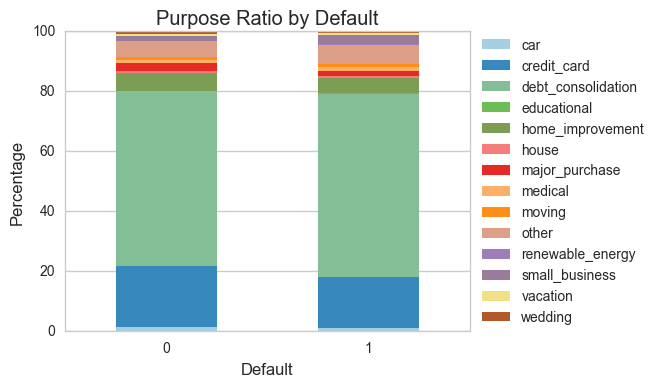

In [69]:
### Purpose by Default

print(loan_train['purpose'].dtype)
print(np.sum(loan_train['purpose'].isnull())) # no NAs
print(loan_train['purpose'].value_counts())


tab = pd.crosstab(loan_train['Default'], loan_train['purpose'])
print(tab)

perc_tab = pd.DataFrame(tab).apply(lambda x: x/np.sum(x)*100, axis=1)
print(perc_tab)

# visualization the ratio
plt.figure(figsize=[20, 20])
perc_tab.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0)
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Purpose Ratio by Default')
plt.xlabel('Default')
plt.ylabel('Percentage')
plt.ylim([0, 100])
#plt.savefig('Purpose_by_default.png', dpi=300)

# statistical test: chi-square
from scipy.stats import chi2_contingency
print(chi2_contingency(tab)) # significant

In [70]:
print(loan_train['title'].dtype)
print(np.sum(loan_train['title'].isnull())) # 11 NAs
print(loan_train['title'].value_counts()) # there are many titles are too detailed, and they are like purpose, ignore

object
11
Debt consolidation                          55667
Credit card refinancing                     17483
Debt Consolidation                           8814
Home improvement                             5065
Other                                        4566
Consolidation                                2842
debt consolidation                           2520
Debt Consolidation Loan                      2419
Major purchase                               1650
Business                                     1337
Credit Card Consolidation                    1302
Personal Loan                                1293
consolidation                                1067
Medical expenses                             1029
Home Improvement                              982
Consolidation Loan                            967
Credit Card Refinance                         766
Car financing                                 760
Credit Card Payoff                            711
Personal                                

count    197583.000000
mean         16.485452
std           7.766562
min           0.000000
25%          10.720000
50%          16.160000
75%          21.920000
max          57.140000
Name: dti, dtype: float64
0
F_onewayResult(statistic=2461.6205643872322, pvalue=0.0)
18.3197782072
16.0808036498
KruskalResult(statistic=59824319.443403721, pvalue=0.0)


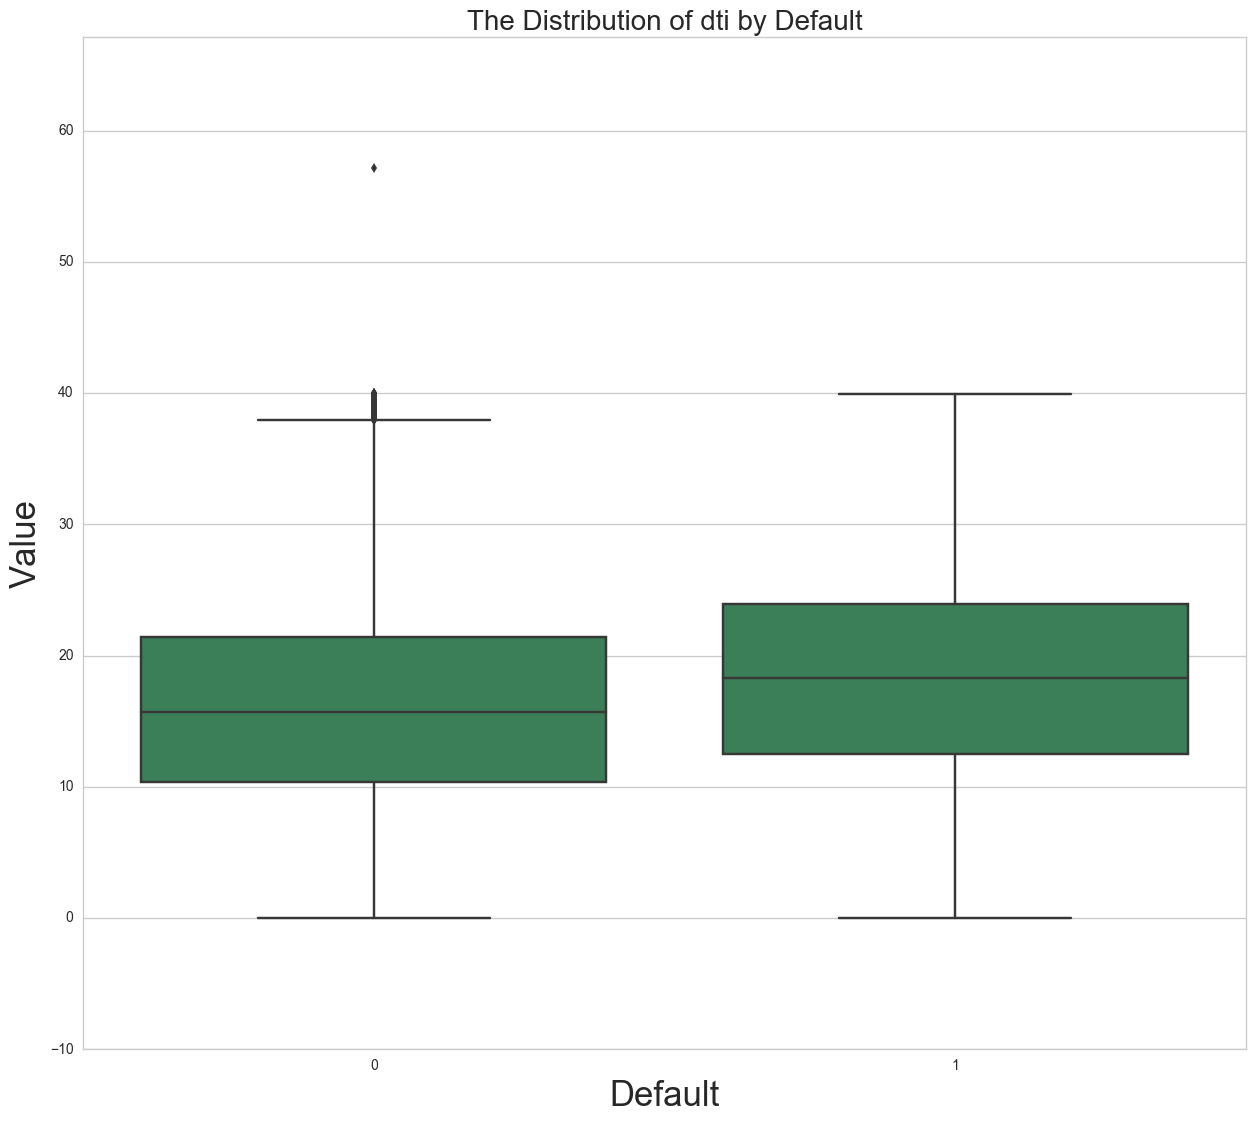

In [71]:
### dti by Default
# debt to income

print(loan_train['dti'].describe())

# the number of NAs
print(np.sum(loan_train['dti'].isnull())) # No NAs

# visualization: the distribution of dti by Default
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
sns.boxplot(x='Default', y='dti', data=loan_train, orient="v", color='#2E8B57')
axes.set_xlabel('Default', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_ylim([loan_train['dti'].min()-10, loan_train['dti'].max()+10])
axes.set_title('The Distribution of dti by Default', fontsize=20, loc='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
#plt.savefig('dti_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['dti'][ind].values, loan_train['dti'][~ind].values]))
print(loan_train['dti'][ind].values.mean())
print(loan_train['dti'][~ind].values.mean())
# significant

from scipy.stats import kruskal
print(kruskal(loan_train['dti'][ind].values, loan_train['dti'][~ind].values)) # significant 

float64
19


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=51.331525223922178, pvalue=7.8283319162057481e-13)
0.277256560338
0.246056704375
KruskalResult(statistic=148338015.25412387, pvalue=0.0)


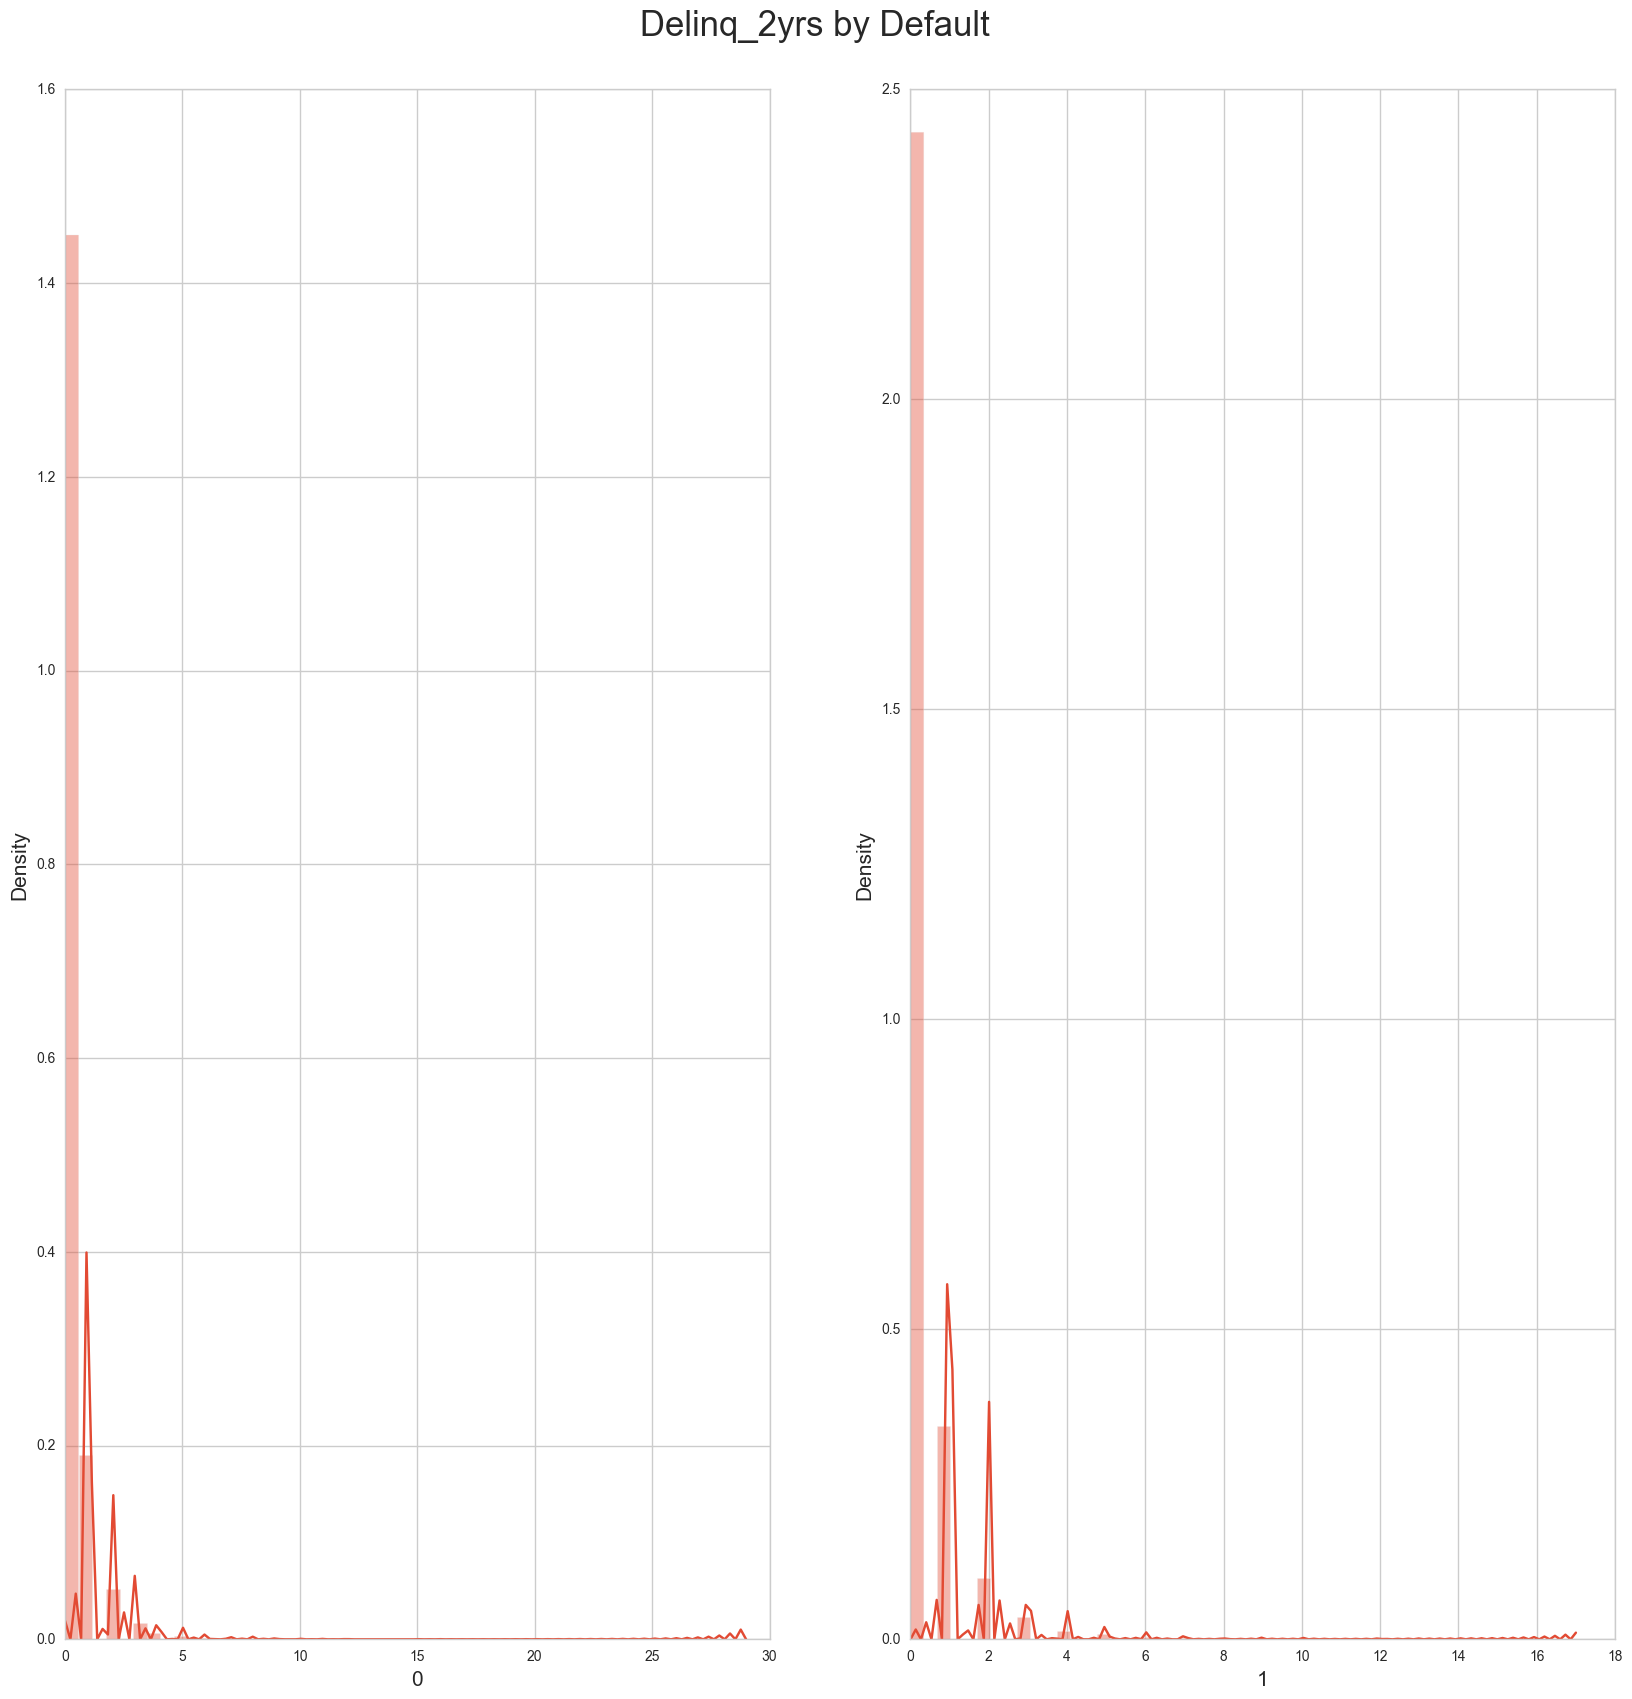

In [86]:
### delinq_2yrs by Default

print(loan_train['delinq_2yrs'].dtype)
print(np.sum(loan_train['delinq_2yrs'].isnull())) # 19 NAs

loan_train = loan_train.ix[~loan_train['delinq_2yrs'].isnull(), :]
loan_train.index = list(range(len(loan_train)))

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[20, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['delinq_2yrs'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['delinq_2yrs'][ind].values, loan_train['delinq_2yrs'][~ind].values]))
print(loan_train['delinq_2yrs'][ind].values.mean())
print(loan_train['delinq_2yrs'][~ind].values.mean())
# significant

from scipy.stats import kruskal
print(kruskal(loan_train['delinq_2yrs'][ind].values, loan_train['delinq_2yrs'][~ind].values)) # significant 

float64
0.0     95820
1.0     56407
2.0     27078
3.0     12495
4.0      3423
5.0      1387
6.0       604
7.0       141
8.0        94
9.0        42
10.0       21
12.0       10
11.0       10
15.0        8
14.0        4
13.0        3
18.0        3
16.0        2
17.0        2
24.0        2
32.0        1
19.0        1
20.0        1
25.0        1
27.0        1
28.0        1
31.0        1
33.0        1
Name: inq_last_6mths, dtype: int64
0


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=774.99882400846252, pvalue=3.1473596265052075e-170)
1.04248466687
0.854025466925
KruskalResult(statistic=70750060.612144873, pvalue=0.0)


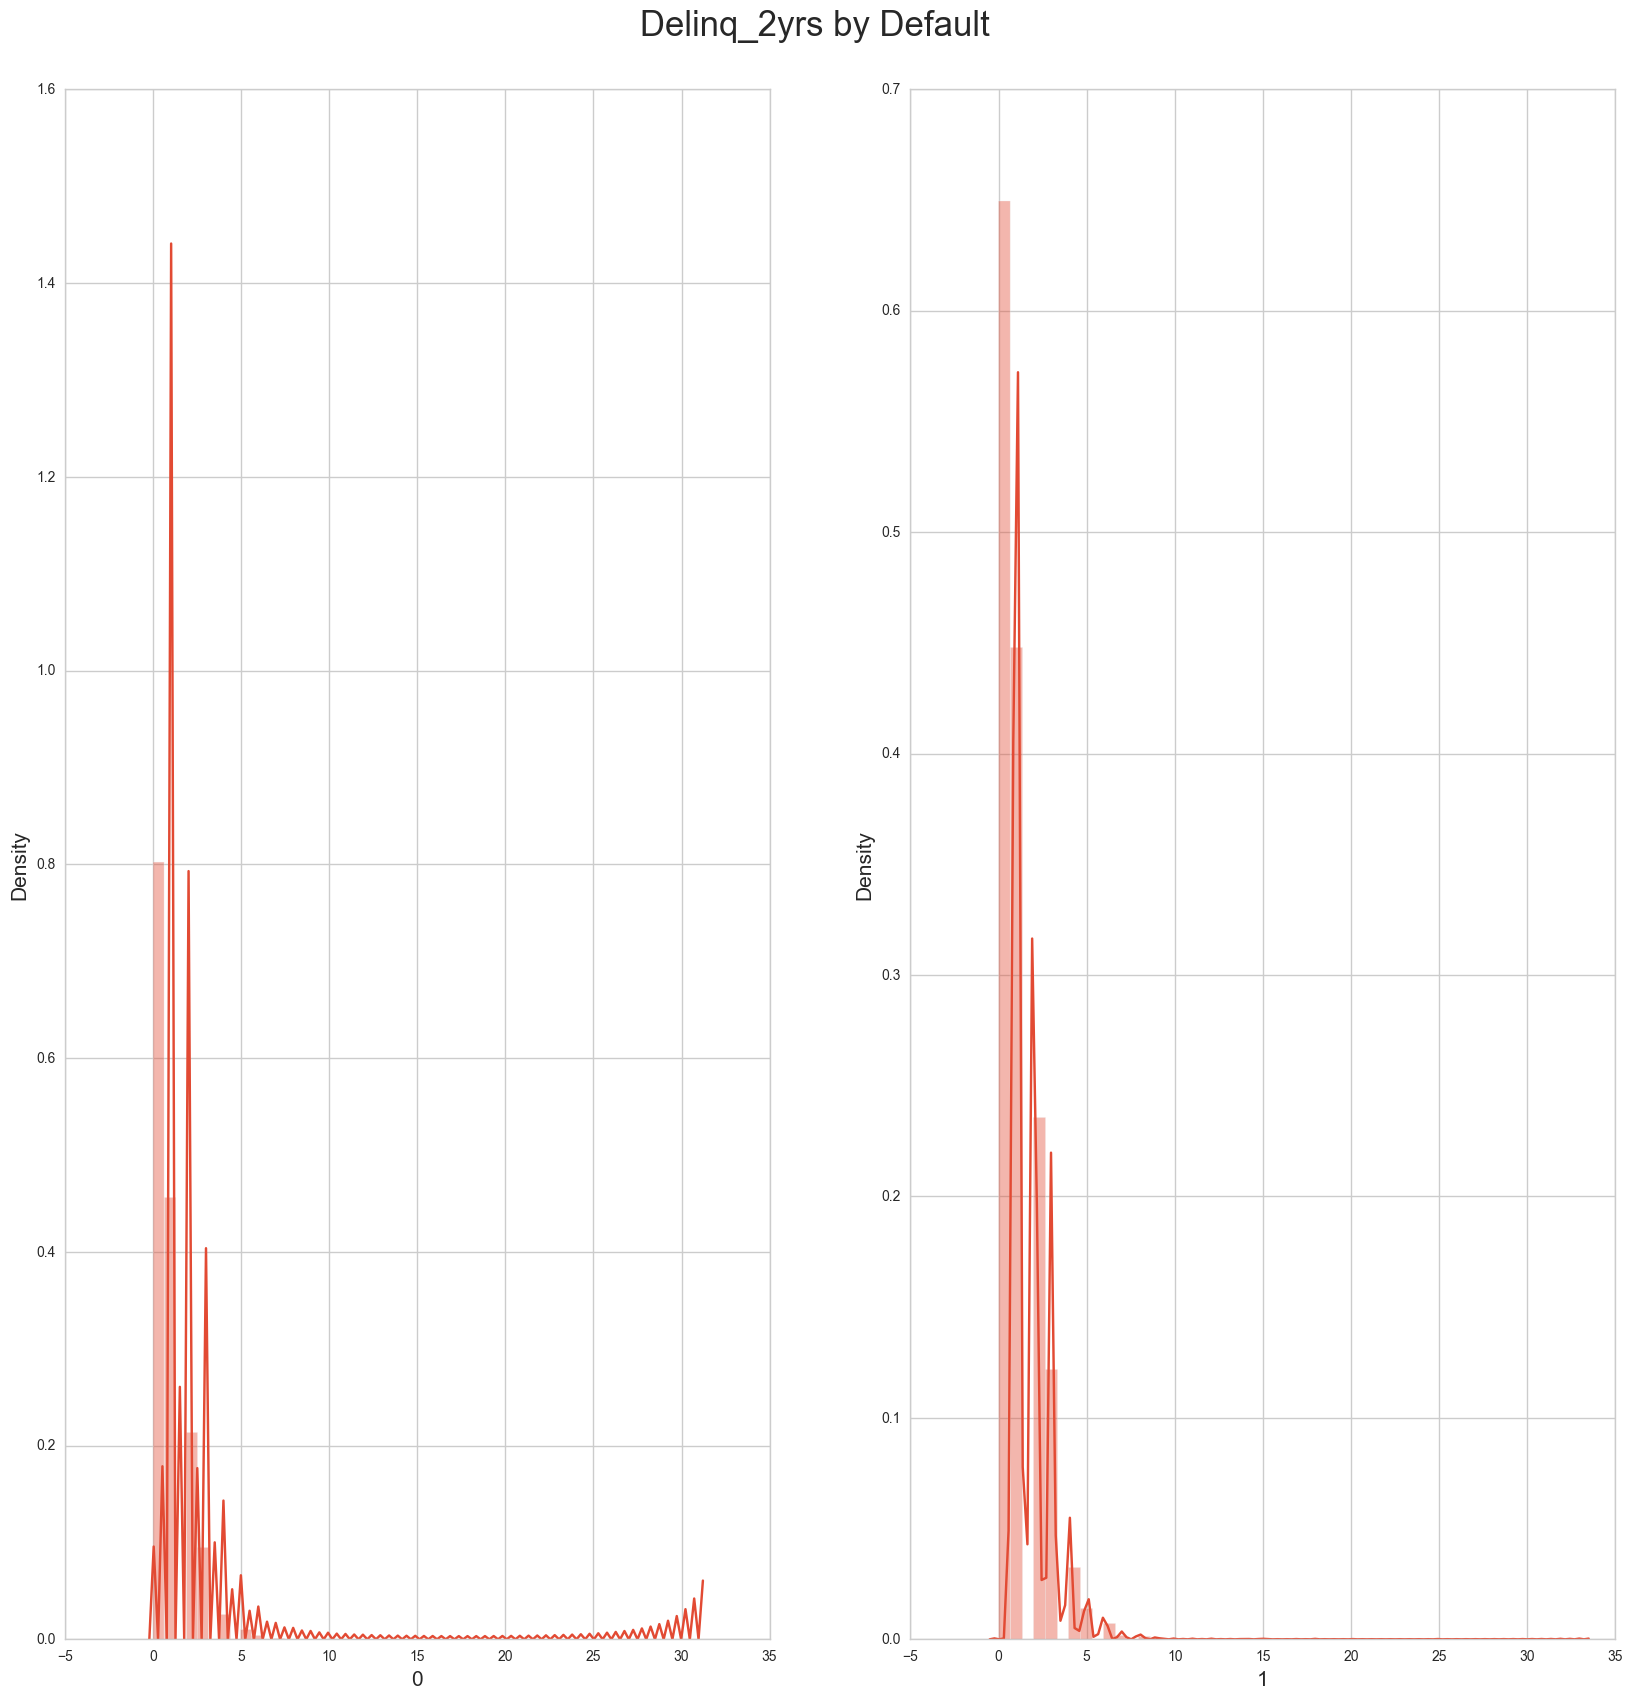

In [92]:
### inq_last_6mths by Default

print(loan_train['inq_last_6mths'].dtype)
print(loan_train['inq_last_6mths'].value_counts())
print(np.sum(loan_train['inq_last_6mths'].isnull()))

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[20, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['inq_last_6mths'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['inq_last_6mths'][ind].values, loan_train['inq_last_6mths'][~ind].values]))
print(loan_train['inq_last_6mths'][ind].values.mean())
print(loan_train['inq_last_6mths'][~ind].values.mean())
# significant

from scipy.stats import kruskal
print(kruskal(loan_train['inq_last_6mths'][ind].values, loan_train['inq_last_6mths'][~ind].values)) # significant 

float64
9.0     18940
8.0     17939
10.0    17871
11.0    16536
7.0     16293
12.0    14495
6.0     13699
13.0    12212
14.0    10243
5.0      9636
15.0     8306
16.0     6811
4.0      5858
17.0     5457
18.0     4407
19.0     3481
3.0      2757
20.0     2688
21.0     2100
22.0     1614
23.0     1229
24.0      990
2.0       972
25.0      725
26.0      514
27.0      401
28.0      276
29.0      228
30.0      160
31.0      125
32.0      122
33.0       87
34.0       74
1.0        68
36.0       43
35.0       43
37.0       33
38.0       24
39.0       20
40.0       17
41.0       13
42.0       12
43.0        9
44.0        5
47.0        5
0.0         4
45.0        4
46.0        4
49.0        3
48.0        2
50.0        2
53.0        2
58.0        1
51.0        1
52.0        1
56.0        1
76.0        1
Name: open_acc, dtype: int64
0


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=36.624302094822887, pvalue=1.434912969384159e-09)
11.1275940292
10.9536875143
KruskalResult(statistic=61070897.872500256, pvalue=0.0)


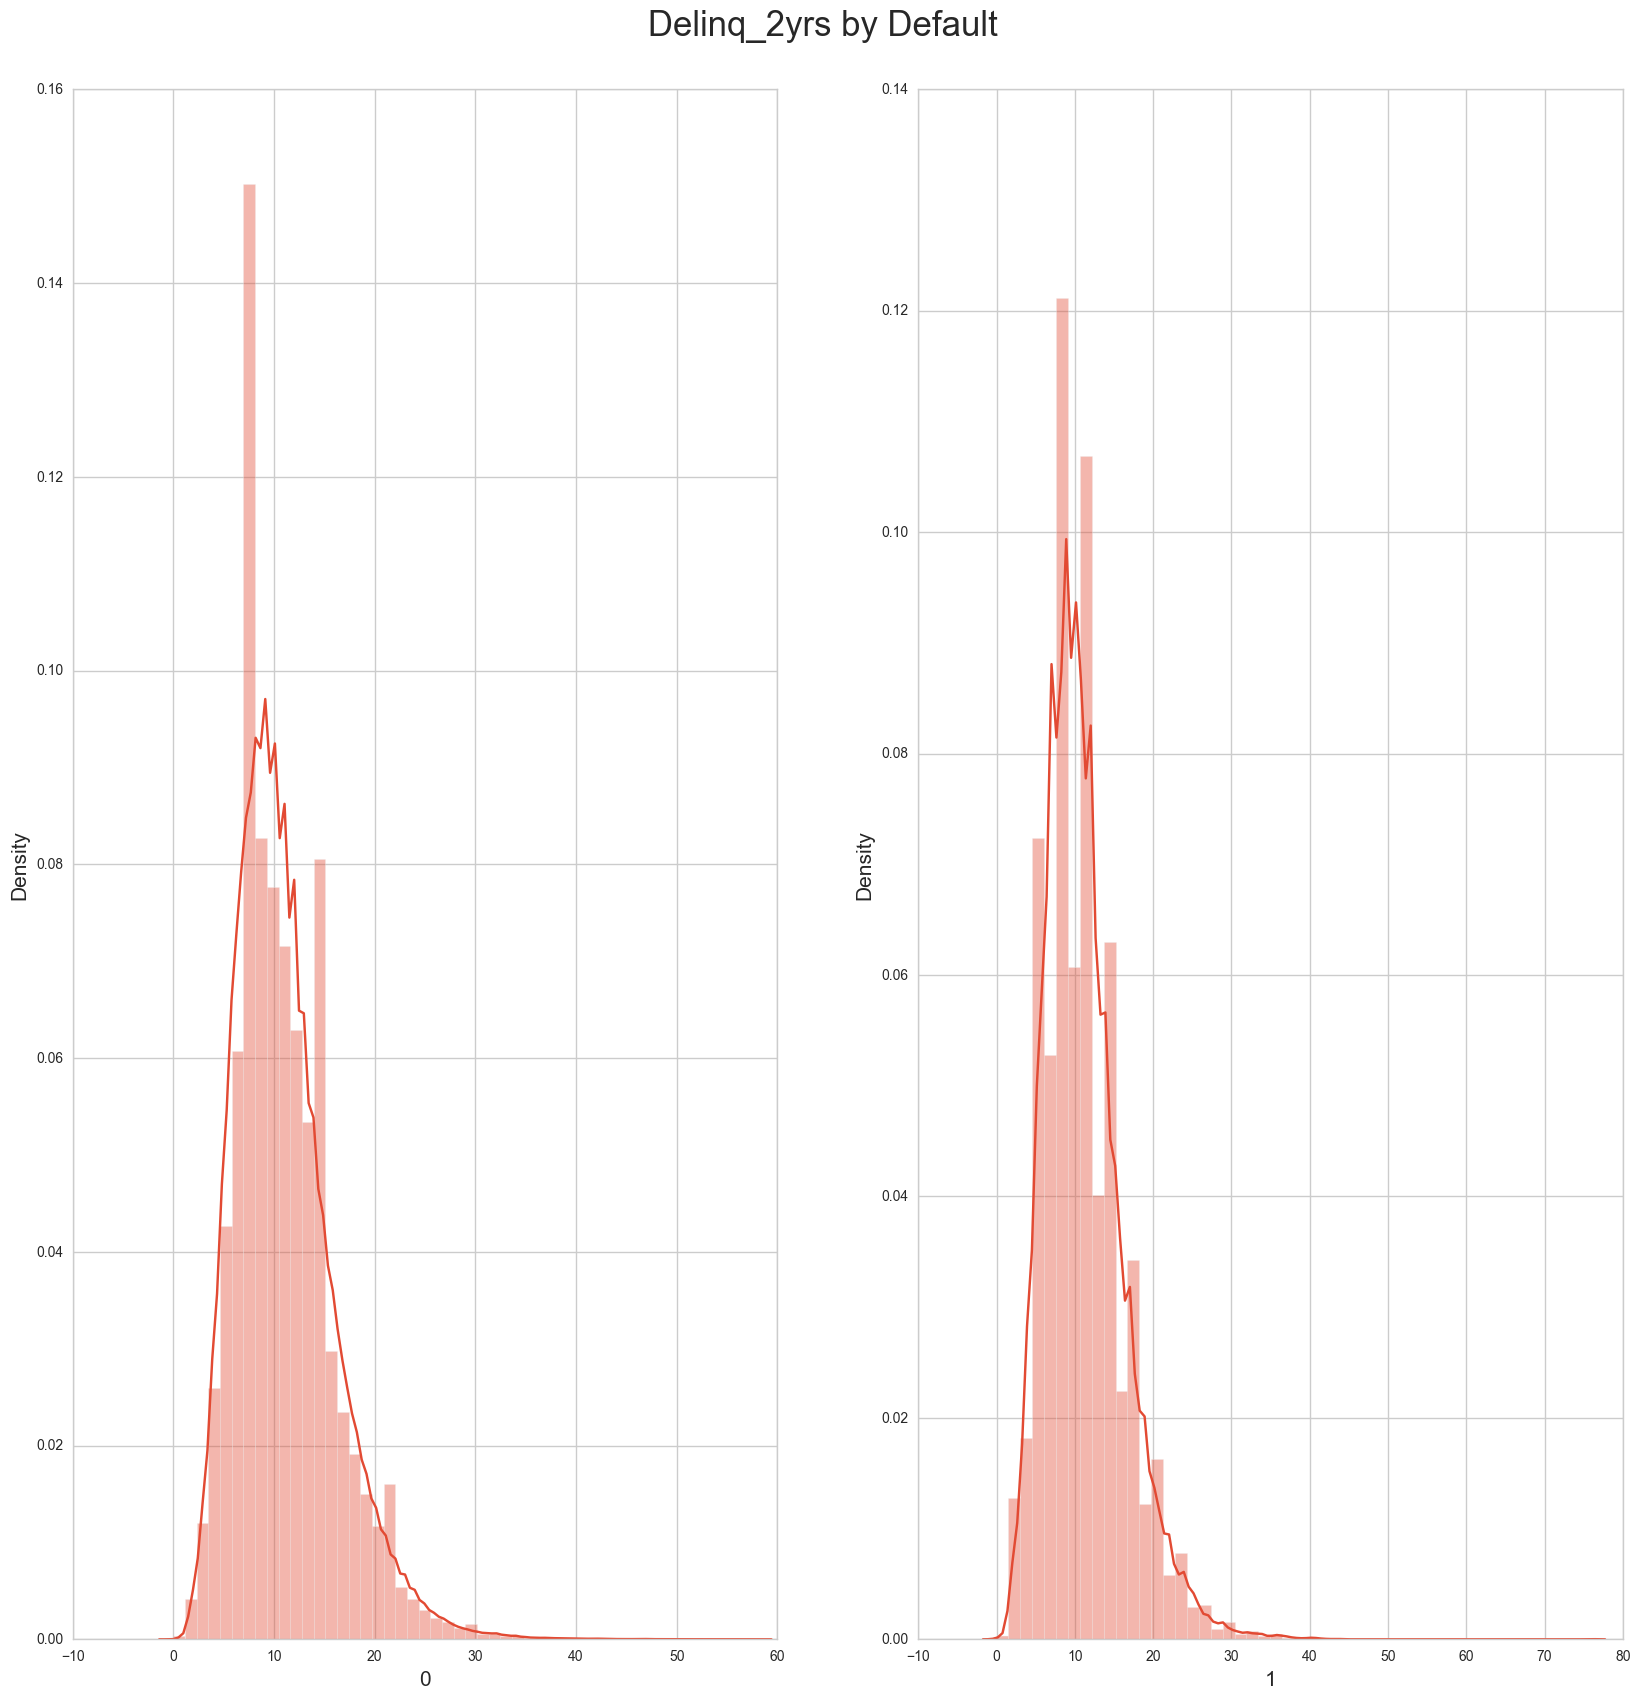

In [99]:
### open_acc by Default

print(loan_train['open_acc'].dtype)
print(loan_train['open_acc'].value_counts())
print(np.sum(loan_train['open_acc'].isnull())) 

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[20, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['open_acc'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)
# distributions are similar

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['open_acc'][ind].values, loan_train['open_acc'][~ind].values]))
print(loan_train['open_acc'][ind].values.mean())
print(loan_train['open_acc'][~ind].values.mean())
# significant

from scipy.stats import kruskal
print(kruskal(loan_train['open_acc'][ind].values, loan_train['open_acc'][~ind].values)) # significant 

float64
0.0     174113
1.0      20712
2.0       1963
3.0        508
4.0        145
5.0         66
6.0         27
7.0         14
8.0          7
10.0         4
9.0          4
15.0         1
Name: pub_rec, dtype: int64
0


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=0.094464070113562865, pvalue=0.75857724669300253)
0.139720502983
0.138949813724
KruskalResult(statistic=193306397.509442, pvalue=0.0)


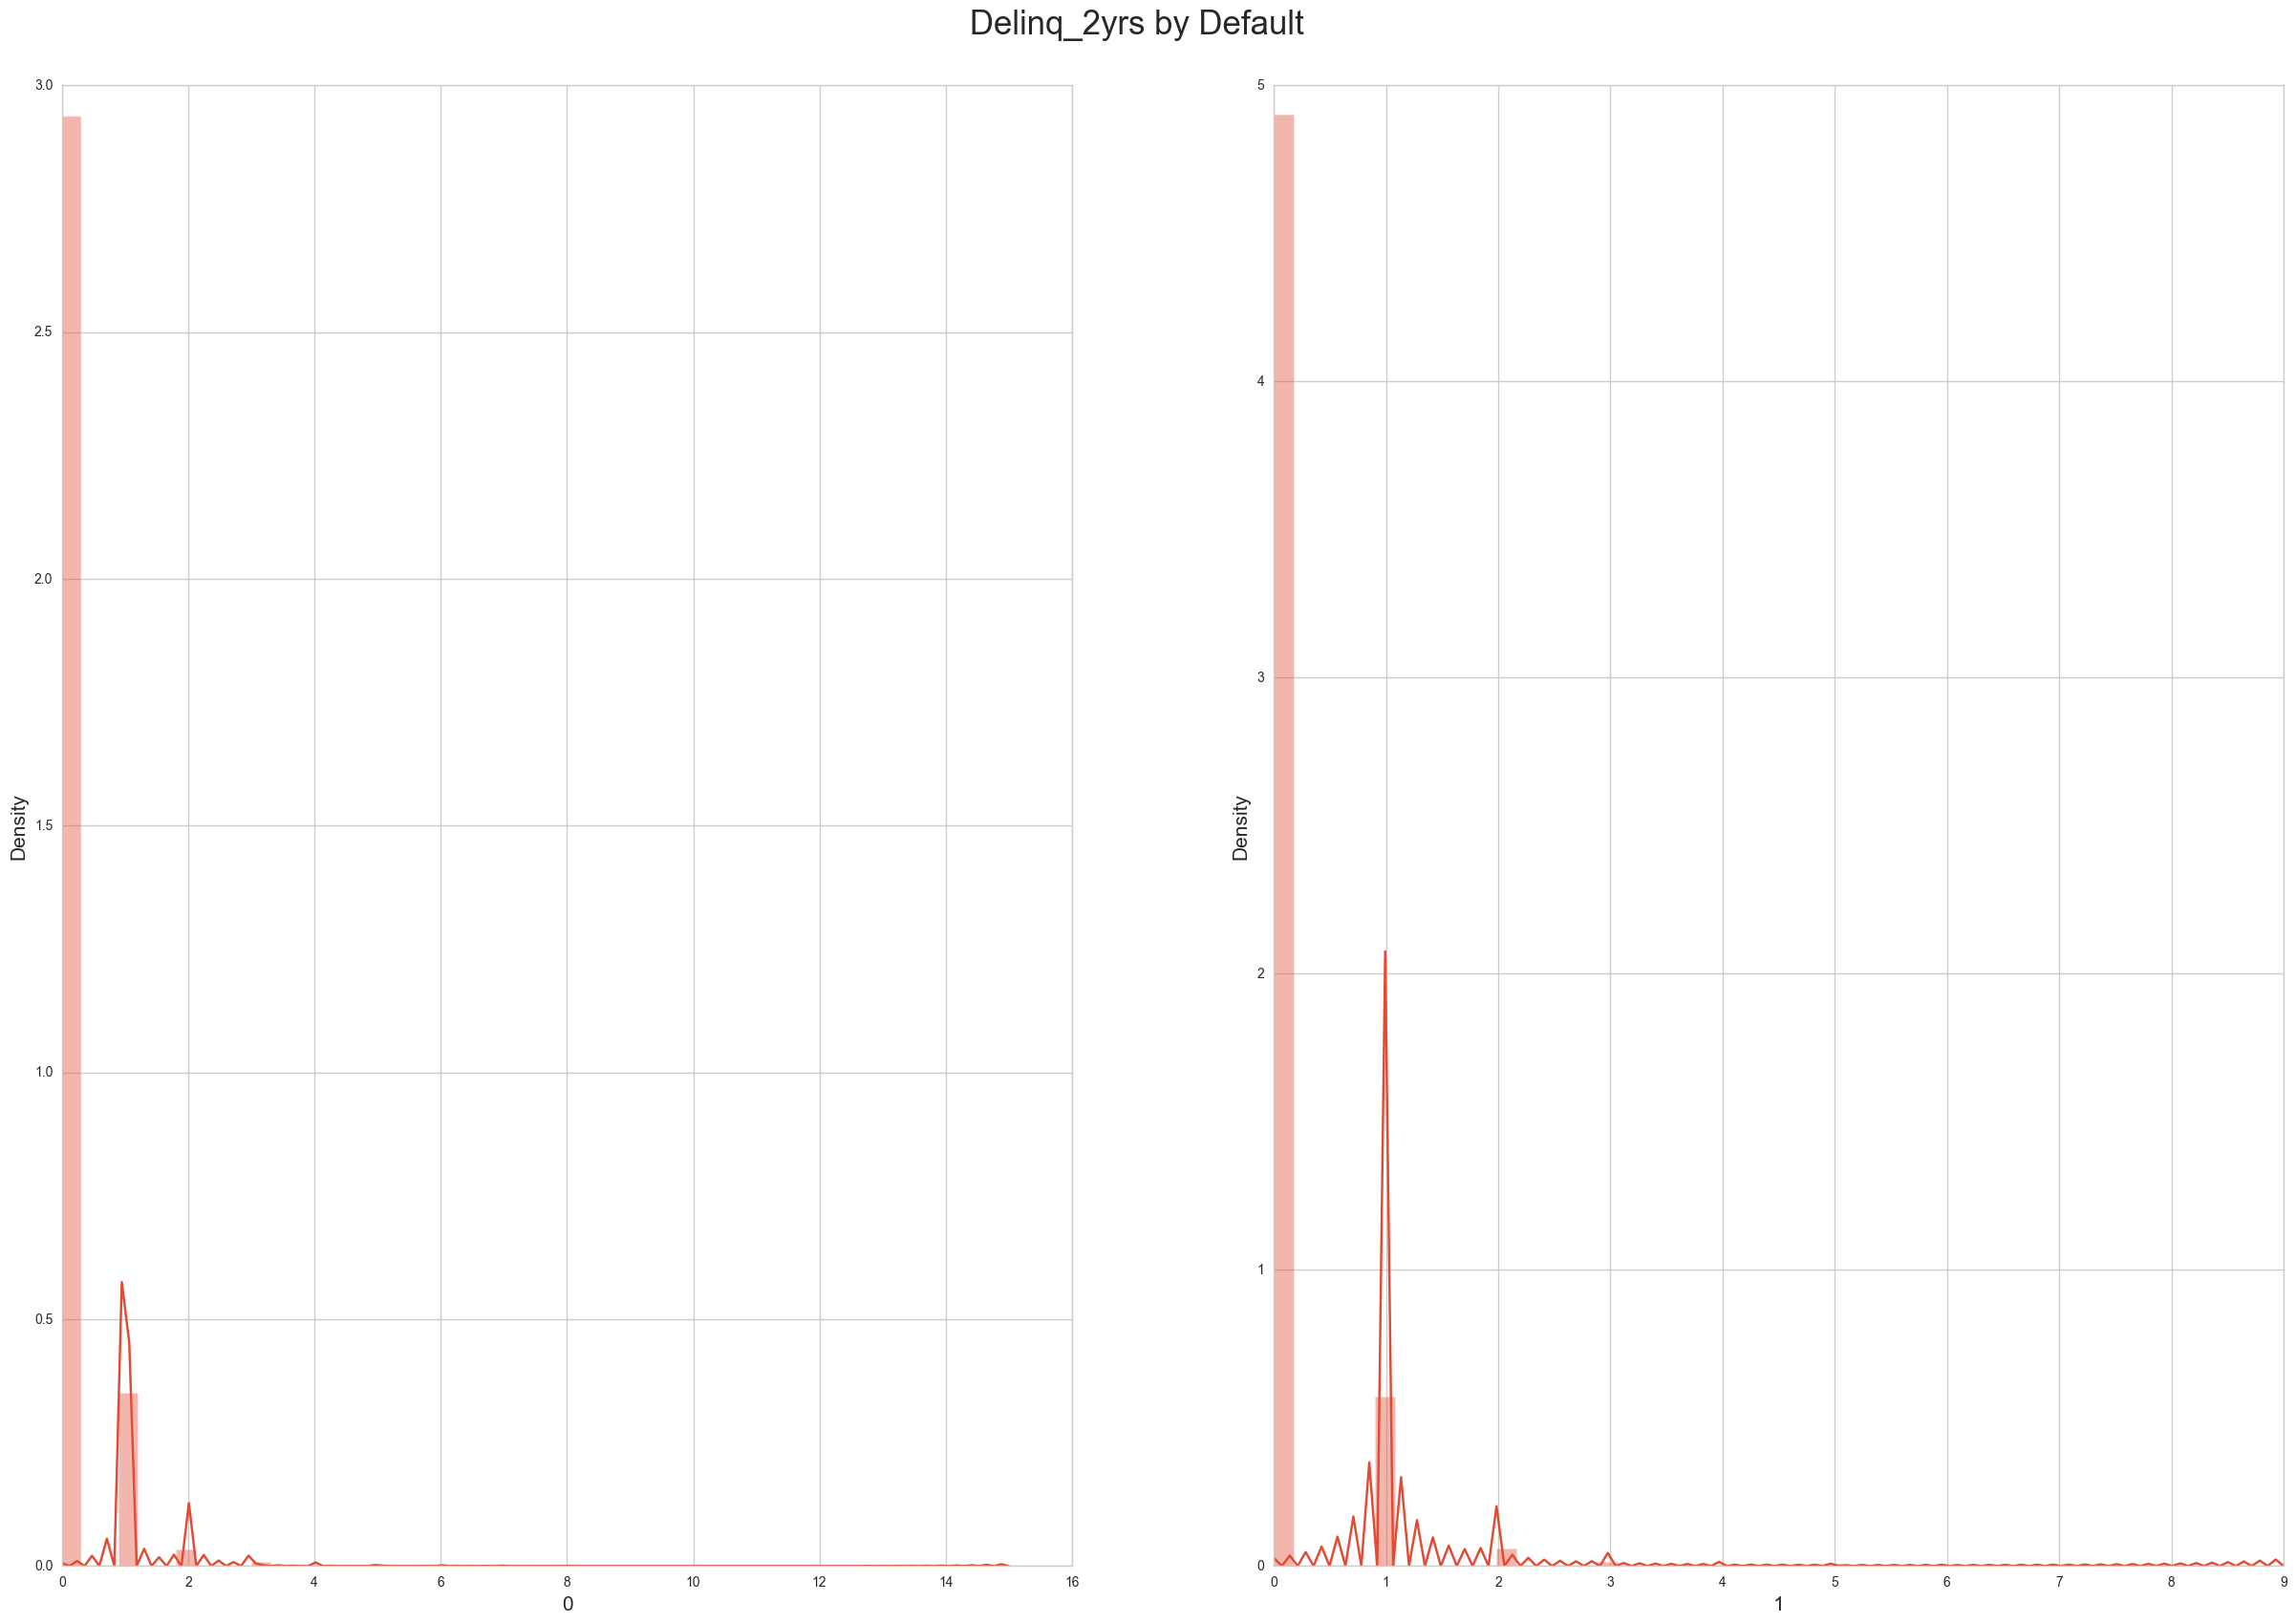

In [103]:
### pub_rec by Default

print(loan_train['pub_rec'].dtype)
print(loan_train['pub_rec'].value_counts())
print(np.sum(loan_train['pub_rec'].isnull())) 

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[30, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['pub_rec'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)
# distributions are similar

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['pub_rec'][ind].values, loan_train['pub_rec'][~ind].values]))
print(loan_train['pub_rec'][ind].values.mean())
print(loan_train['pub_rec'][~ind].values.mean())
# non-significant

from scipy.stats import kruskal
print(kruskal(loan_train['pub_rec'][ind].values, loan_train['pub_rec'][~ind].values)) # significant 

float64
0.0         1441
6297.0        23
8443.0        23
7556.0        22
6969.0        22
3221.0        22
4875.0        22
6683.0        22
7905.0        21
6095.0        21
7081.0        21
10218.0       21
5283.0        21
6507.0        21
5389.0        21
4811.0        21
9499.0        21
10362.0       20
3565.0        20
5804.0        20
7185.0        20
4483.0        20
8476.0        20
9306.0        20
7604.0        20
7792.0        20
10036.0       20
12177.0       20
5098.0        20
10189.0       19
            ... 
36936.0        1
36871.0        1
36864.0        1
36782.0        1
36831.0        1
36786.0        1
36787.0        1
36788.0        1
36790.0        1
36794.0        1
36798.0        1
36804.0        1
36810.0        1
36820.0        1
36823.0        1
36829.0        1
36834.0        1
36859.0        1
36836.0        1
36838.0        1
36840.0        1
36846.0        1
36847.0        1
36848.0        1
36849.0        1
36852.0        1
36856.0        1
36857.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=2.0213520587519409, pvalue=0.15510256304597447)
15271.4813342
15436.5981144
KruskalResult(statistic=60772044.048054561, pvalue=0.0)


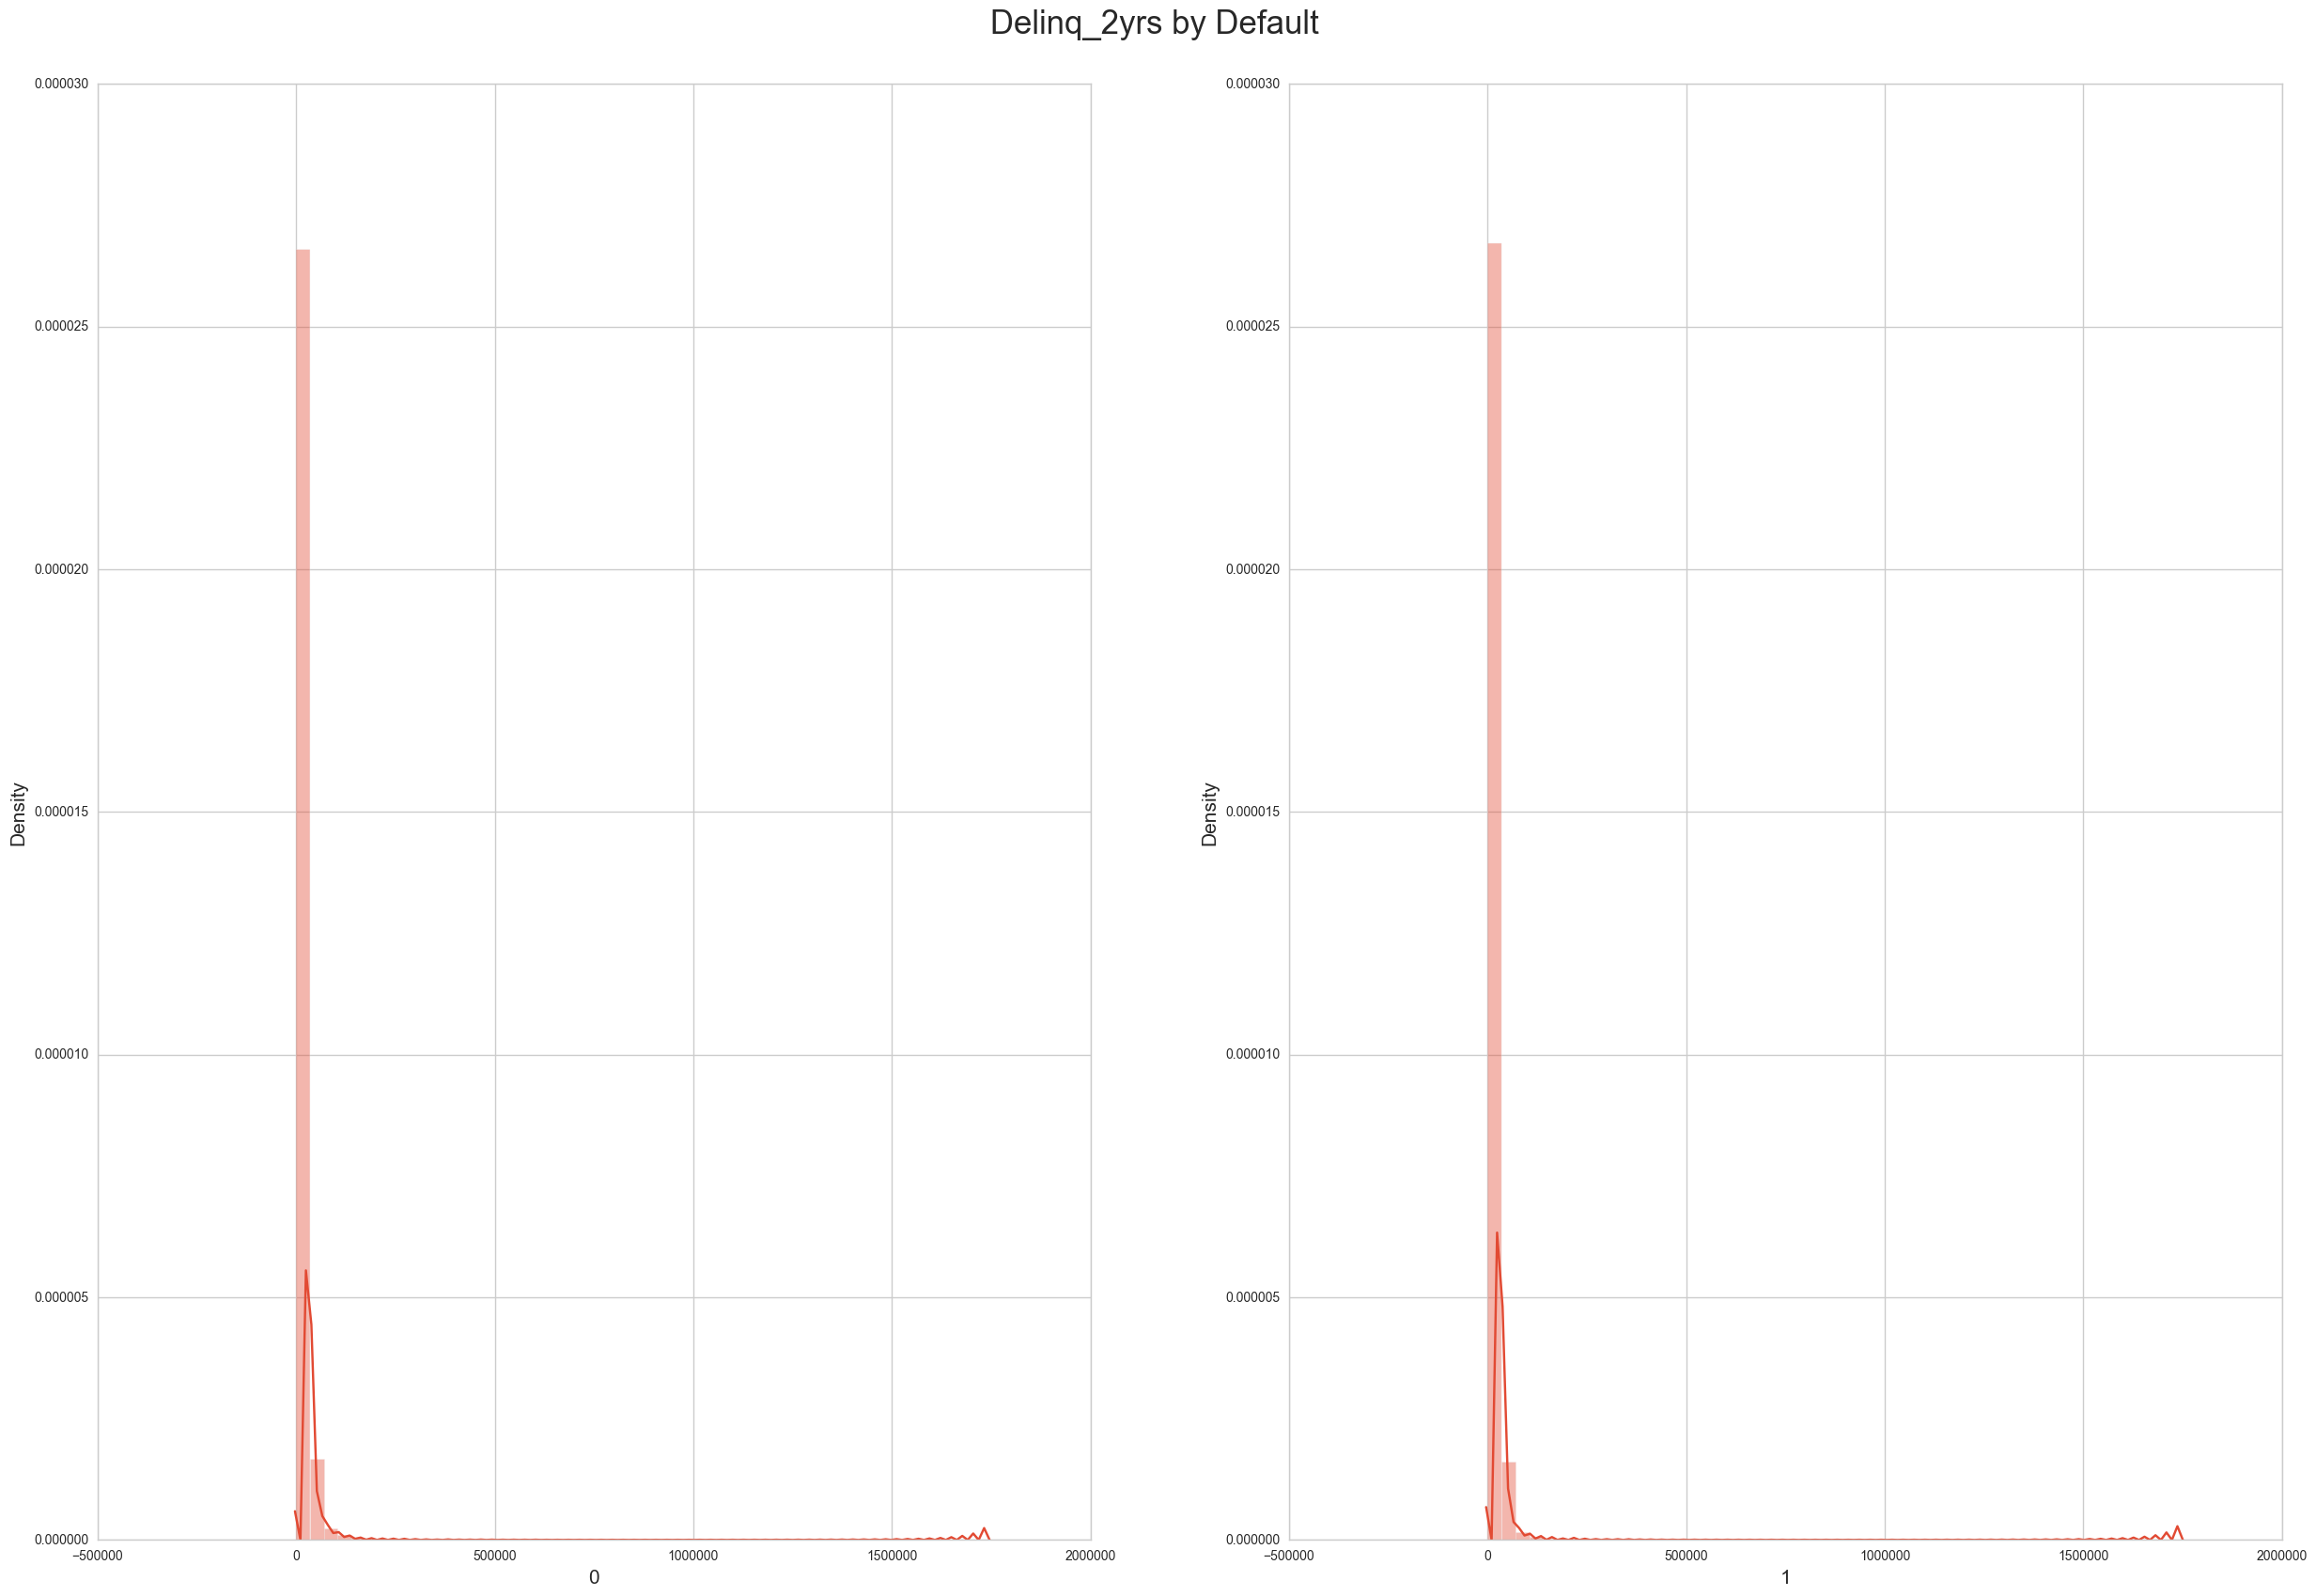

In [105]:
### revol_bal by Default

print(loan_train['revol_bal'].dtype)
print(loan_train['revol_bal'].value_counts())
print(np.sum(loan_train['revol_bal'].isnull())) 

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[30, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['revol_bal'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)
# distributions are similar

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['revol_bal'][ind].values, loan_train['revol_bal'][~ind].values]))
print(loan_train['revol_bal'][ind].values.mean())
print(loan_train['revol_bal'][~ind].values.mean())
# non-significant

from scipy.stats import kruskal
print(kruskal(loan_train['revol_bal'][ind].values, loan_train['revol_bal'][~ind].values)) # significant 

float64
20.0     7190
21.0     7136
22.0     7050
19.0     6988
23.0     6936
18.0     6882
17.0     6851
24.0     6822
16.0     6588
25.0     6492
15.0     6241
26.0     6201
27.0     6037
14.0     5800
28.0     5728
13.0     5602
29.0     5583
30.0     5210
12.0     5050
31.0     4835
32.0     4600
11.0     4511
33.0     4269
10.0     4009
34.0     3954
35.0     3658
36.0     3378
9.0      3347
37.0     3144
8.0      2850
         ... 
72.0       15
75.0       15
78.0       15
77.0       12
76.0       11
81.0       10
80.0        9
84.0        9
88.0        7
79.0        7
83.0        6
91.0        5
85.0        5
87.0        4
82.0        4
89.0        3
90.0        3
92.0        3
93.0        2
102.0       2
99.0        2
110.0       1
98.0        1
101.0       1
118.0       1
96.0        1
95.0        1
94.0        1
86.0        1
150.0       1
Name: total_acc, dtype: int64
0


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


F_onewayResult(statistic=205.21877225528308, pvalue=1.6010468907312086e-46)
24.2483266586
25.2341882032
KruskalResult(statistic=60834224.374859907, pvalue=0.0)


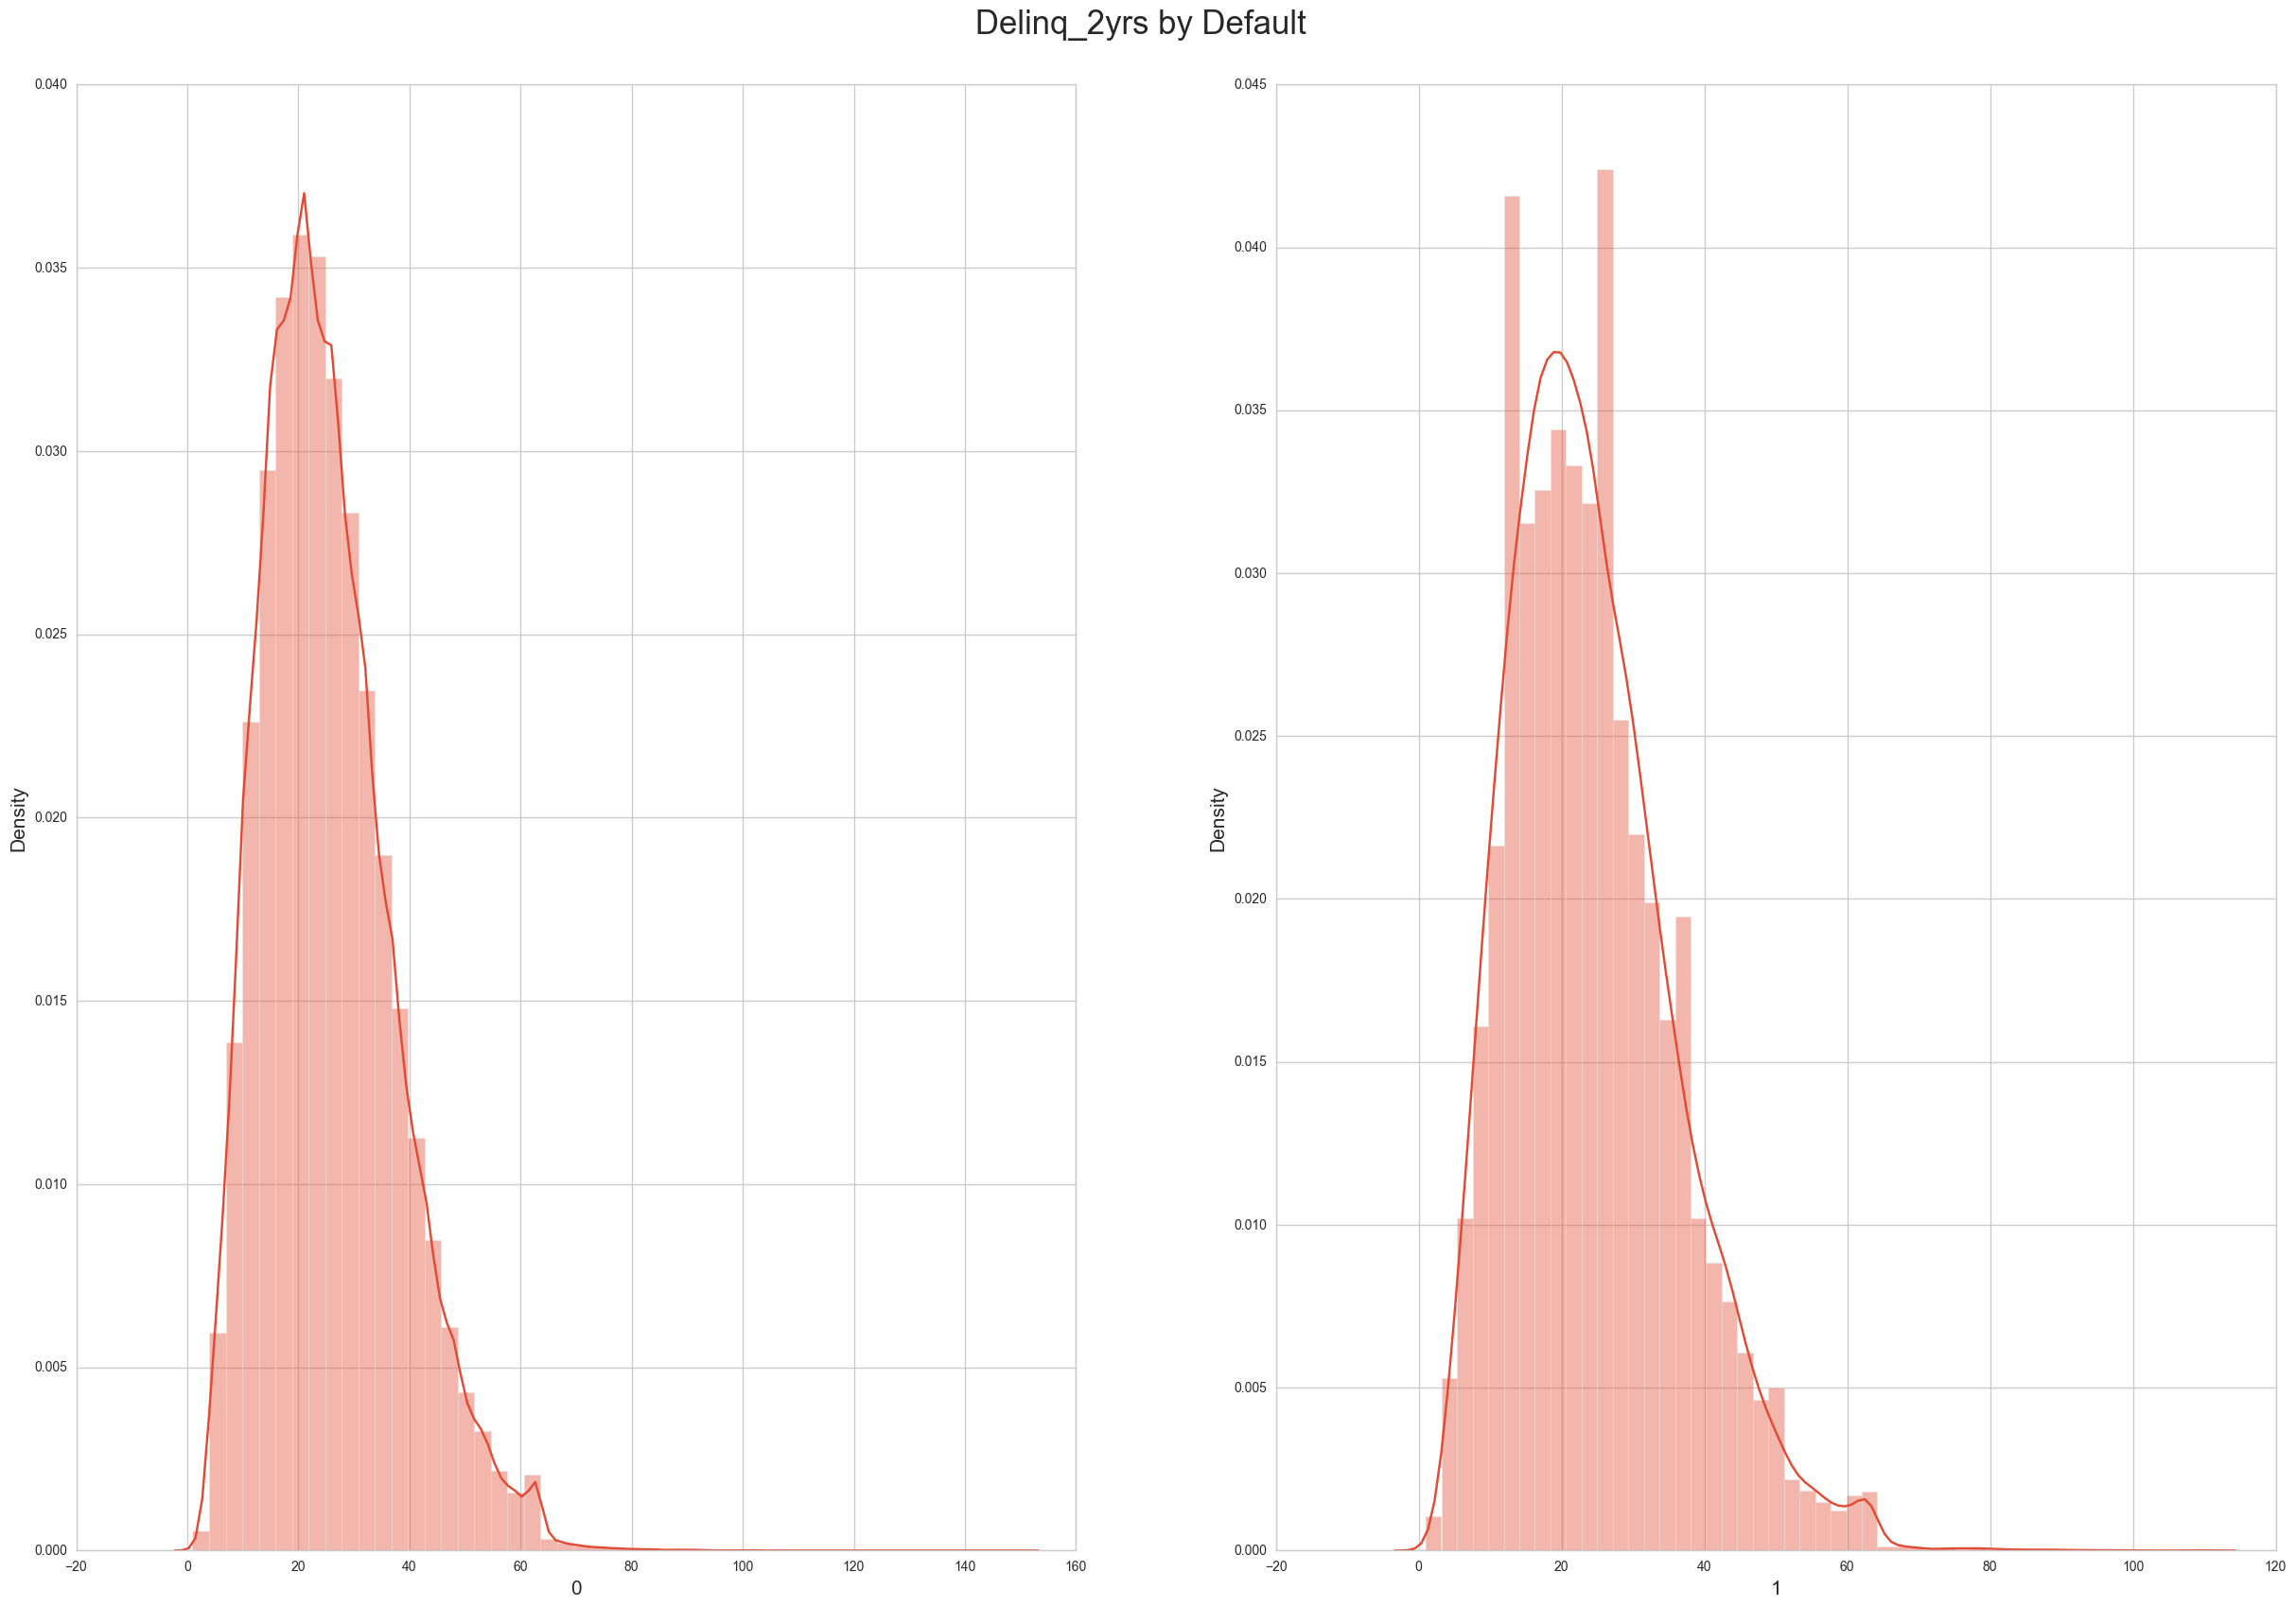

In [112]:
### revol_bal by Default

print(loan_train['total_acc'].dtype)
print(loan_train['total_acc'].value_counts())
print(np.sum(loan_train['total_acc'].isnull())) 

# visualization: the distribution of dti by Default
fig = plt.figure(figsize=[30, 20])
plt.suptitle('Delinq_2yrs by Default', fontsize=25, y=0.94)
for (i, default) in enumerate(list(np.unique(loan_train['Default'])), start=1):
    axes = fig.add_subplot(1, 2, i)
    axes.tick_params(labelsize=10)    
    sns.distplot(loan_train['total_acc'][loan_train['Default'] == default].values)
    axes.set_xlabel(default, fontsize=15)
    axes.set_ylabel('Density', fontsize=15)
#fig.tight_layout()
#plt.savefig('delinq_2yrs_distribution_by_default.png', dpi=300)
# distributions are similar

# statistical test: ANOVA
ind = loan_train['Default'] == 1
from scipy.stats import f_oneway
print(f_oneway(*[loan_train['total_acc'][ind].values, loan_train['total_acc'][~ind].values]))
print(loan_train['total_acc'][ind].values.mean())
print(loan_train['total_acc'][~ind].values.mean())
# non-significant

from scipy.stats import kruskal
print(kruskal(loan_train['total_acc'][ind].values, loan_train['total_acc'][~ind].values)) # significant 

In [79]:
loan_train['delinq_2yrs'][loan_train['Default'] == 0].values

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [84]:
np.unique(loan_train['delinq_2yrs'])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  22.,  29.,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [75]:
# feature use: 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 

# variable type: ..., category(purpose), dti(value), delinq_2yrs(value), inq_last_6mths(value),  
# for home_ownership, transform the NONE and ANY to OTHER
